# Examples for EDSS progression annotation parameter choices

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

from definitions import edssprogression
from tools import visualization

sns.set_theme(color_codes=True)
sns.set_style("whitegrid", {"grid.color": "gainsboro"})

### Example of all four event types

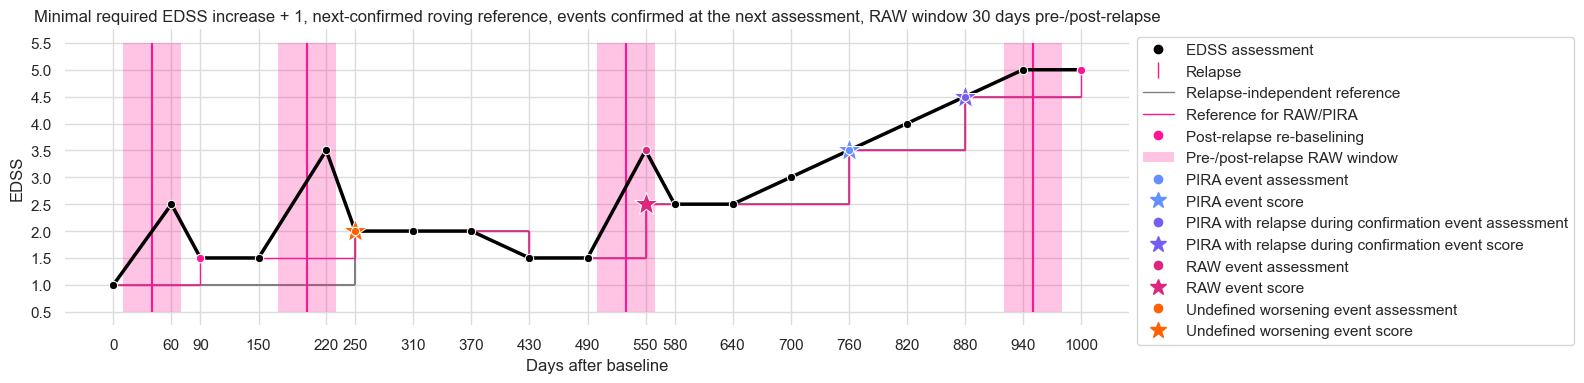

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    [
        {"days_after_baseline": 0, "edss_score": 1.0},
        {"days_after_baseline": 60, "edss_score": 2.5},
        {"days_after_baseline": 90, "edss_score": 1.5},
        {"days_after_baseline": 150, "edss_score": 1.5},
        {"days_after_baseline": 220, "edss_score": 3.5},
        {"days_after_baseline": 250, "edss_score": 2.0},
        {"days_after_baseline": 310, "edss_score": 2.0},
        {"days_after_baseline": 370, "edss_score": 2.0},
        {"days_after_baseline": 430, "edss_score": 1.5},
        {"days_after_baseline": 490, "edss_score": 1.5},
        {"days_after_baseline": 550, "edss_score": 3.5},
        {"days_after_baseline": 580, "edss_score": 2.5},
        {"days_after_baseline": 640, "edss_score": 2.5},
        {"days_after_baseline": 700, "edss_score": 3.0},
        {"days_after_baseline": 760, "edss_score": 3.5},
        {"days_after_baseline": 820, "edss_score": 4.0},
        {"days_after_baseline": 880, "edss_score": 4.5},
        {"days_after_baseline": 940, "edss_score": 5.0},
        {"days_after_baseline": 1000, "edss_score": 5.0},
    ]
)
visualization.annotate_plot_follow_up(
    follow_up_dataframe=example_follow_up,
    relapse_timestamps=[40, 200, 530, 950],
    opt_baseline_type="roving",
    opt_roving_reference_require_confirmation=True,
    opt_roving_reference_confirmation_time=0.5,
    opt_require_confirmation=True,
    opt_confirmation_time=0.5,
    opt_confirmation_included_values="all",
    opt_raw_before_relapse_max_time=30,
    opt_raw_after_relapse_max_time=30,
    show_legend=True,
    move_legend_out=True,
    ax=ax,
)
ax.set_title("Minimal required EDSS increase + 1, next-confirmed roving reference, events confirmed at the next assessment, RAW window 30 days pre-/post-relapse")
ax.set_xlabel("Days after baseline")
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Example of multiple events, confirmation at the next assessment required, next-confirmed roving
reference, RAW window 30 days pre- and post-relapse, min. increase + 1.0. The worsening at day 60 after the first relapse is
not confirmed, thus it is not classified as RAW. The residual disability measured at the post-relapse re-baselining assessment at
day 90 is used as new reference, and the post-relapse re-baselining assessment at day 250 after the second relapse is a
progression with respect to the initial reference but neither RAW nor PIRA, thus it is classified as undefined worsening. The
roving reference is reset at day 430 (confirmed at day 490), thus the worsening at day 550 is a confirmed (at day 580) RAW
event with event score 2.5. The increase at day 760 confirmed at day 820 is PIRA with respect to this new post-event reference
with an event score of 3.5. The confirmation assessment for the increase at day 880 is in the RAW window of the subsequent
relapse, thus the increase is classified as PIRA with relapse during confirmation.

# **Part 1 - Relapse-Independent Definitions**

# Baselines

## Baseline types

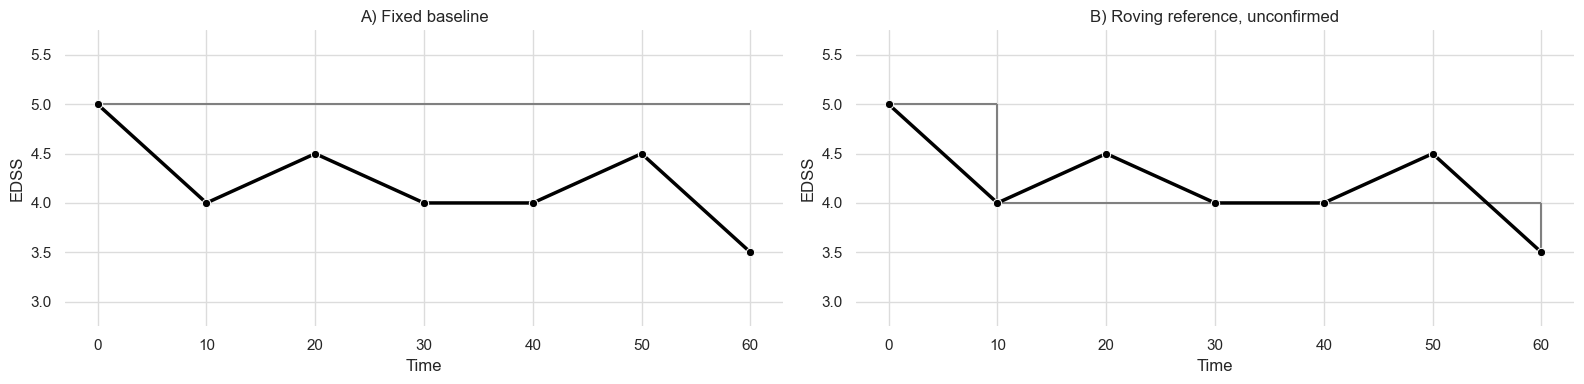

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40, 50, 60],
        "edss_score": [5.0, 4.0, 4.5, 4.0, 4.0, 4.5, 3.5],
    }
)
for i, baseline_setting in enumerate(
    [
        ("fixed", "A) Fixed baseline"),
        ("roving", "B) Roving reference, unconfirmed"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type=baseline_setting[0],
        opt_roving_reference_require_confirmation=False,
        opt_roving_reference_confirmation_time=0,
        show_legend=False,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(baseline_setting[1])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: **A)** Fixed baseline. **B)** Roving reference without confirmation requirement. The reference is reset at the
improvements at steps 10 and 60.

## Options for roving reference

### Confirmation for roving reference

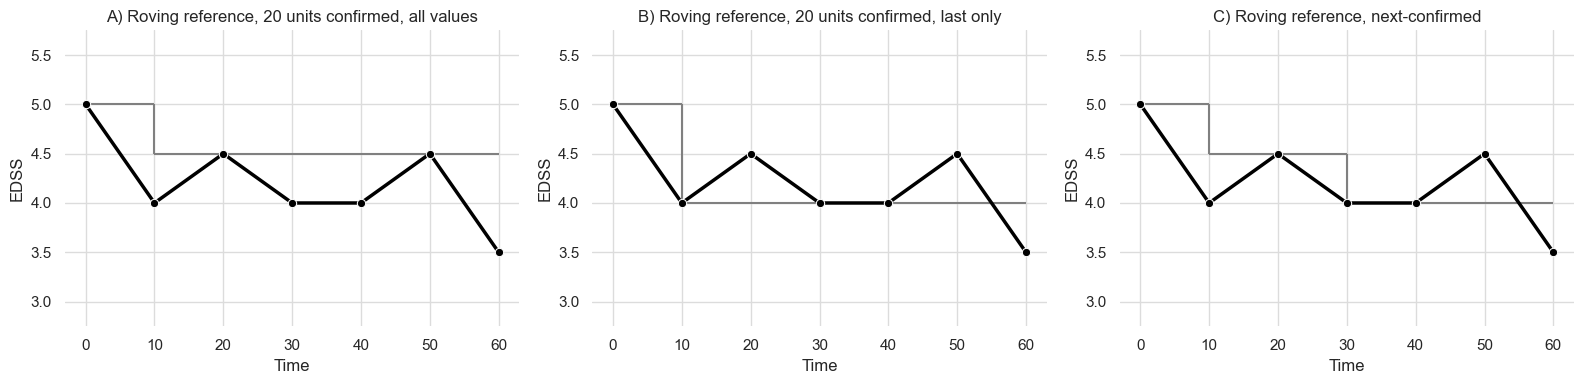

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40, 50, 60],
        "edss_score": [5.0, 4.0, 4.5, 4.0, 4.0, 4.5, 3.5],
    }
)
for i, baseline_setting in enumerate(
    [
        (20, "all", "A) Roving reference, 20 units confirmed, all values"),
        (20, "last", "B) Roving reference, 20 units confirmed, last only"),
        (0.5, "all", "C) Roving reference, next-confirmed"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="roving",
        opt_roving_reference_require_confirmation=True,
        opt_roving_reference_confirmation_time=baseline_setting[0],
        opt_roving_reference_confirmation_included_values=baseline_setting[1],
        show_legend=False,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(baseline_setting[2])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: **A)** Roving reference confirmed over a given time interval (20 units), all values included. The
improvement at step 10 is confirmed at steps 20 and 30 with score 4.5, but the improvement at step 30 is not
confirmed at step 50, thus it does not qualify as a new reference. **B)** Roving reference confirmed over a given
time interval (20 units), last only. The confirmation assessment for the improvement at step 10 is the one at step
30 (the one at step 20 is ignored), thus the new reference is 4.0. **C)** Roving reference confirmed at the next
assessment. The improvement at step 10 is confirmed at step 20, but only at 4.5, thus the new roving reference is
4.5. The improvement at step 30 is confirmed at step 40, thus the reference is reset again. The improvement at
step 60 is unconfirmed.

### Tolerance for confirming the roving reference

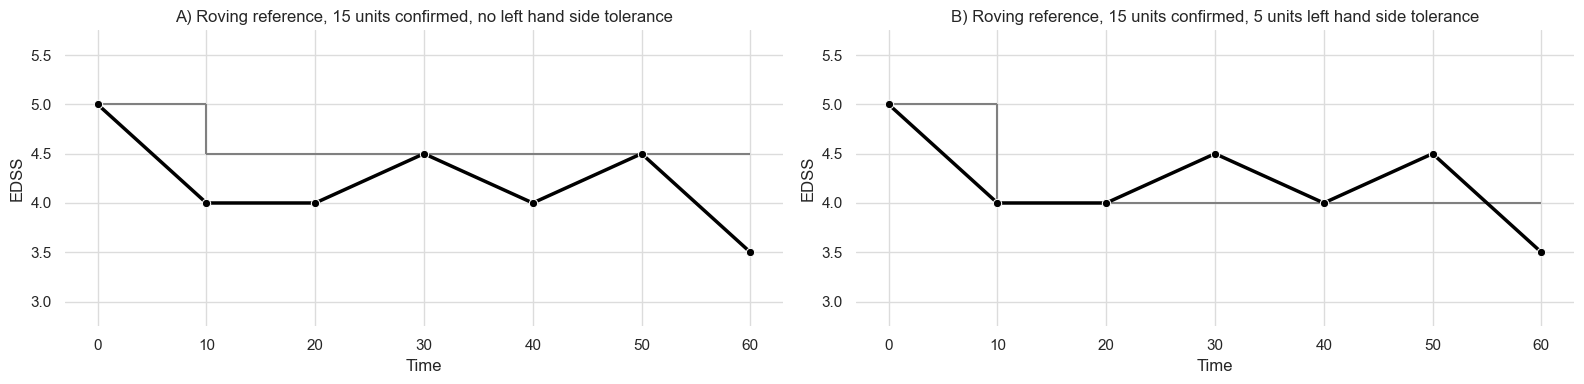

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40, 50, 60],
        "edss_score": [5.0, 4.0, 4.0, 4.5, 4.0, 4.5, 3.5],
    }
)
for i, baseline_setting in enumerate(
    [
        (0, "A) Roving reference, 15 units confirmed, no left hand side tolerance"),
        (5, "B) Roving reference, 15 units confirmed, 5 units left hand side tolerance"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="roving",
        opt_roving_reference_require_confirmation=True,
        opt_roving_reference_confirmation_time=15,
        opt_roving_reference_confirmation_time_left_side_max_tolerance=baseline_setting[0],
        opt_roving_reference_confirmation_time_right_side_max_tolerance=np.inf,
        show_legend=False,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(baseline_setting[1])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Roving reference, 15 units confirmed, all values included. **A)** No tolerance, i.e. the first score that
satisfies the confirmation distance condition for the improvement at step 10 is the one at step 30 (minimal
timestamp = t<sub>i</sub> + Δt – tolerance = 10 + 15 - 0 = 25). The confirmation scores are thus 4.0 (step 20) and 4.5 (step 30),
and the new reference is thus 4.5. B) 5 units tolerance, i.e. the first score that satisfies the confirmation distance
condition is the one at step 20 (minimal timestamp = t<sub>i</sub> + Δt – tolerance = 10 + 15 - 5 = 20). The confirmation score and
the new reference is thus 4.0. Legend: Black dots represent EDSS scores, and the grey curve represents the
reference.

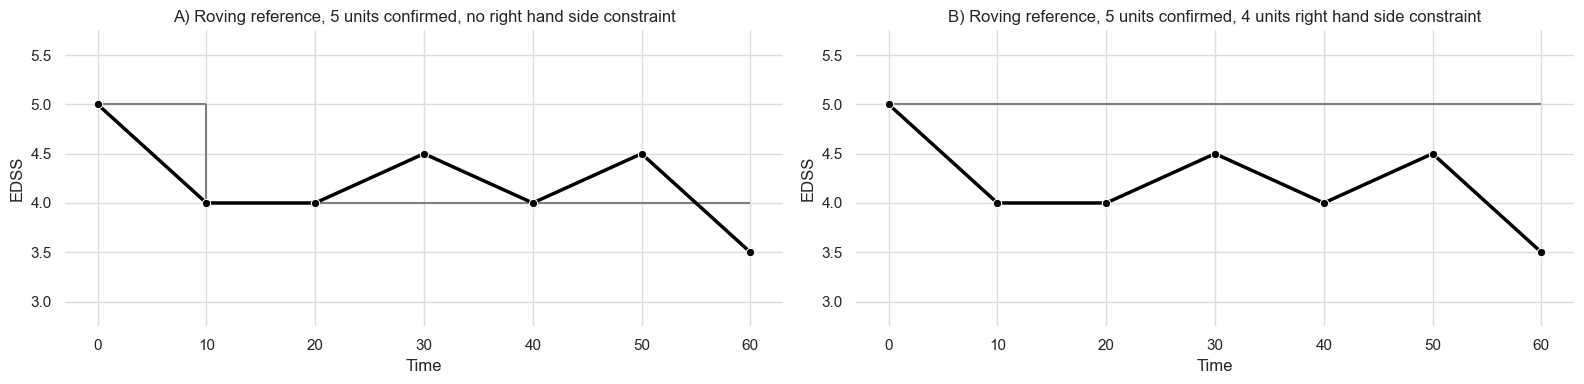

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40, 50, 60],
        "edss_score": [5.0, 4.0, 4.0, 4.5, 4.0, 4.5, 3.5],
    }
)
for i, baseline_setting in enumerate(
    [
        (np.inf, "A) Roving reference, 5 units confirmed, no right hand side constraint"),
        (4, "B) Roving reference, 5 units confirmed, 4 units right hand side constraint"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="roving",
        opt_roving_reference_require_confirmation=True,
        opt_roving_reference_confirmation_time=5,
        opt_roving_reference_confirmation_time_left_side_max_tolerance=0,
        opt_roving_reference_confirmation_time_right_side_max_tolerance=baseline_setting[0],
        show_legend=False,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(baseline_setting[1])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Roving reference, 5 units confirmed, all values included. **A)** No right-hand constraint. **B)** Right-hand
constraint of max. 4 units, thus the score at step 20 does not qualify as a confirmation score for step 10 (maximal
timestamp = t<sub>i</sub> + Δt + constraint = 10 + 5 + 4 = 19).

# Minimal increase

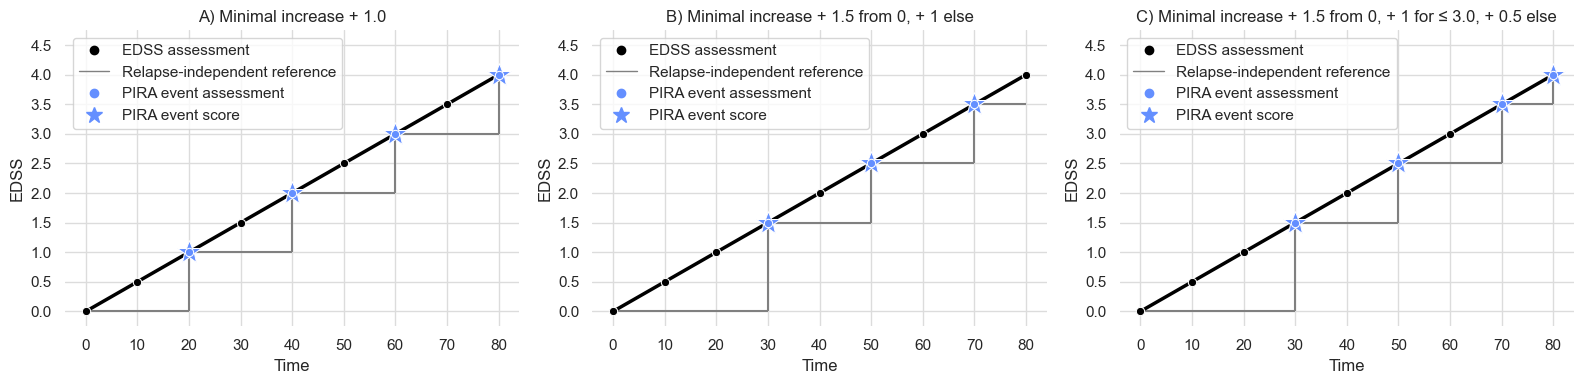

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for i, options in enumerate(
    [
        (4.0, False, "A) Minimal increase + 1.0"),
        (4.0, True, "B) Minimal increase + 1.5 from 0, + 1 else"),
        (3.0, True, "C) Minimal increase + 1.5 from 0, + 1 for ≤ 3.0, + 0.5 else"),
        
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=pd.DataFrame(
            {
                "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70, 80],
                "edss_score": [0, 0.5, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0],
            }
        ),
        opt_max_score_that_requires_plus_1=options[0],
        opt_larger_increment_from_0=options[1],
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(options[2])
for ax in axes:
    ax.set_ylim((-0.25, 4.75))
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Minimal increase options. **A)** Minimal increase + 1.0 irrespective of the reference. **B)** Minimal increase +
1.5 for reference 0, + 1.0 else. **C)** Minimal increase + 1.5 for reference 0, minimal increase + 1.0 for references up
to and including 3.0, and + 0.5 else. The reference is reset after each event.

# Event confirmation

## Confirmed score

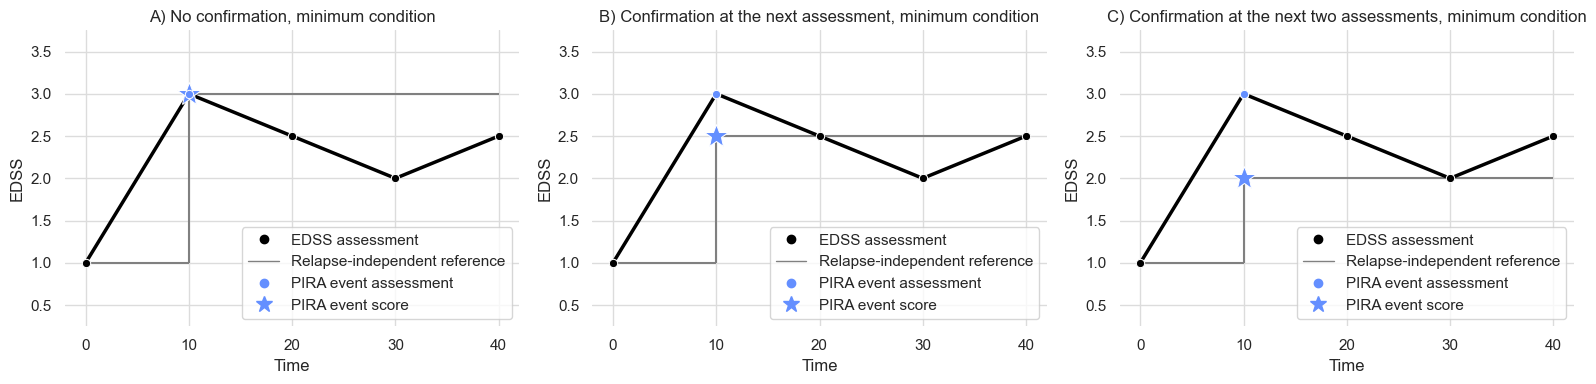

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40],
        "edss_score": [1, 3.0, 2.5, 2.0, 2.5],
    }
)
for i, confirmation_setting in enumerate(
    [
        (False, 0, "A) No confirmation, minimum condition"),
        (True, 10, "B) Confirmation at the next assessment, minimum condition"),
        (True, 20, "C) Confirmation at the next two assessments, minimum condition"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="fixed",
        opt_require_confirmation=confirmation_setting[0],
        opt_confirmation_time=confirmation_setting[1],
        opt_confirmation_type="minimum",
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(confirmation_setting[2])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Confirmed score. **A)** No confirmation required. The event score for the increase at step 10 is 3.0. **B)**
Confirmation at the next assessment required. The score at the next assessment also fulfills the criterion of an
increase of at least + 1.0 with respect to the baseline, so the increase at step 10 is confirmed, but only at 2.5. **C)** 
Confirmation at the next two assessments required. The scores at the next two assessment also fulfill the criterion
of an increase of at least + 1.0 with respect to the baseline, so the increase at step 10 is confirmed, but only at
2.0. Minimal increase + 1.0.

## Confirmation condition

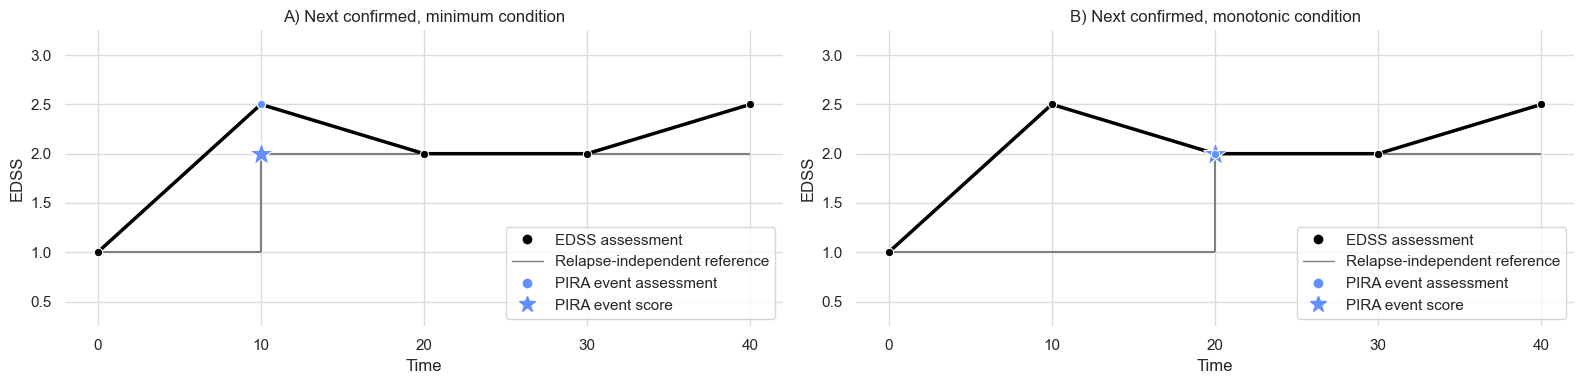

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40],
        "edss_score": [1, 2.5, 2.0, 2.0, 2.5],
    }
)
for i, confirmation_setting in enumerate(
    [
        ("minimum", "A) Next confirmed, minimum condition"),
        ("monotonic", "B) Next confirmed, monotonic condition"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="fixed",
        opt_require_confirmation=True,
        opt_confirmation_time=0.5,
        opt_confirmation_type=confirmation_setting[0],
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(confirmation_setting[1])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Confirmation conditions. **A)** Minimum condition. The score at step 20 fulfills the confirmation criterion,
so the increase at step 10 is a confirmed event with event score 2.0. **B)** Monotonic condition. The increase at step
10 is not a confirmed event because the confirmation score at step 20 is lower. However, the increase at step 20
is confirmed by the score at step 30. Minimal increase + 1.0, confirmation at the next assessment required.

## Confirmation interval

### All vs. last

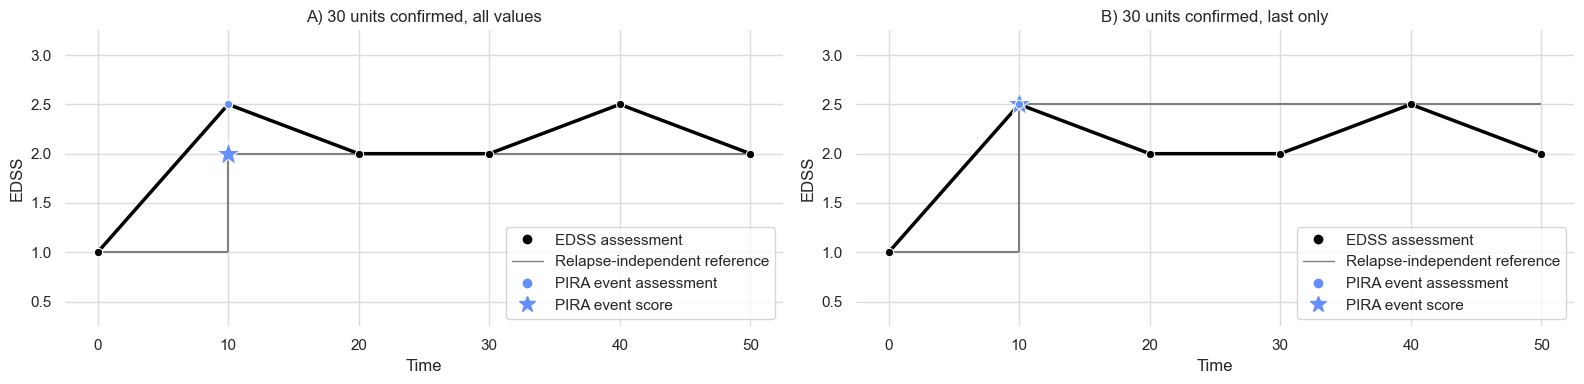

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40, 50],
        "edss_score": [1, 2.5, 2.0, 2.0, 2.5, 2.0],
    }
)
for i, confirmation_setting in enumerate(
    [
        ("all", "A) 30 units confirmed, all values"),
        ("last", "B) 30 units confirmed, last only"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="fixed",
        opt_require_confirmation=True,
        opt_confirmation_time=30,
        opt_confirmation_included_values=confirmation_setting[0],
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(confirmation_setting[1])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Confirmation value inclusion options. **A)** All scores within the confirmation interval must satisfy the
confirmation condition. For a confirmation over 30 units, the confirmation scores for the event at step 10 are thus
the scores at steps 20, 30, and 40, and the confirmed event score is 2.0. **B)** Only the first score at or after the
required confirmation time must satisfy the confirmation condition. The confirmation score for the event at step 10
is thus the score at step 40, and the confirmed event score is 2.5. Minimal increase + 1.0, minimum confirmation
condition.

### Confirmation duration types - no confirmation, next, interval, sustained

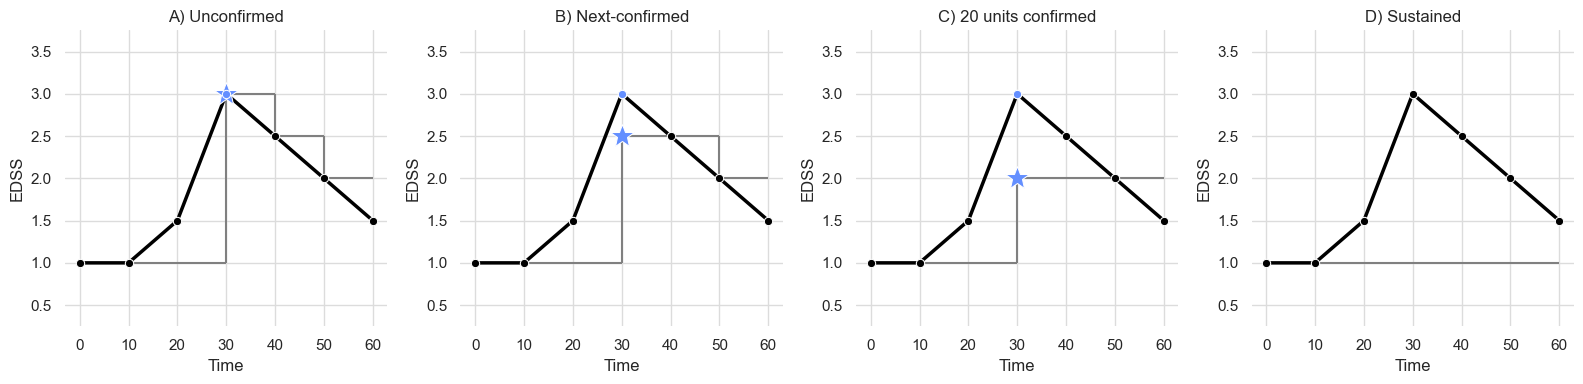

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40, 50, 60],
        "edss_score": [1, 1, 1.5, 3.0, 2.5, 2.0, 1.5],
    }
)
for i, confirmation_setting in enumerate(
    [
        (False, 0, "A) Unconfirmed"),
        (True, 0.5, "B) Next-confirmed"),
        (True, 20, "C) 20 units confirmed"),
        (True, -1, "D) Sustained"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_require_confirmation=confirmation_setting[0],
        opt_confirmation_time=confirmation_setting[1],
        show_legend=False,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(confirmation_setting[2])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Confirmation distance types. **A)** Unconfirmed disability accrual, event at step 30 with event score 3.0.
**B)** Next-confirmed disability accrual, event at step 30 with event score 2.5. **C)** 20 units confirmed, event at step 30
with event score 2.0. **D)** Sustained, i.e. there is no event because the last score of the follow-up is not sufficiently
larger than the reference. Minimum increase + 1.0, minimum condition. Legend: Black dots represent EDSS
scores, blue stars represent PIRA event scores, blue dots represent PIRA event assessments, and the grey curve
represents the reference.

### Left hand tolerance

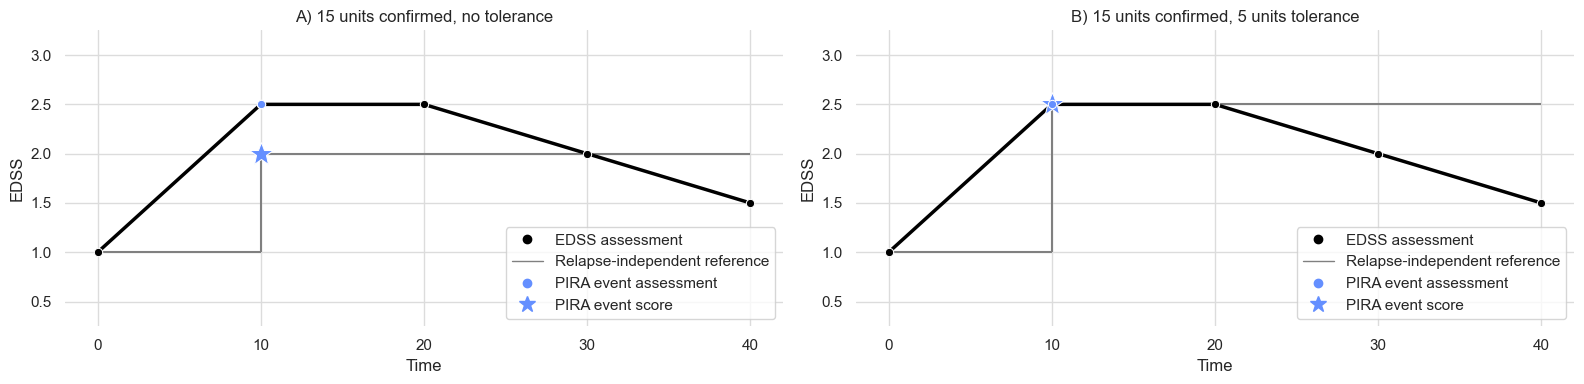

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40],
        "edss_score": [1, 2.5, 2.5, 2.0, 1.5],
    }
)
for i, confirmation_setting in enumerate(
    [
        (0, "A) 15 units confirmed, no tolerance"),
        (5, "B) 15 units confirmed, 5 units tolerance"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="fixed",
        opt_require_confirmation=True,
        opt_confirmation_time=15,
        opt_confirmation_time_left_side_max_tolerance=confirmation_setting[0],
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(confirmation_setting[1])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Left-hand tolerance for event confirmation, 15 units confirmation required. **A)** No tolerance, i.e. the
confirmation scores for the event at step 10 are the scores at steps 20 and 30 (the first one that satisfies t<sub>j</sub> ≥ t<sub>i</sub> +
Δt), thus the confirmed event score is 2.0. **B)** 5 units tolerance, thus the score at step 20 already satisfies the t<sub>j</sub> ≥ t<sub>i</sub> + 
Δt - tolerance condition, and the score at step 30 is not required for confirmation anymore. Minimum increase + 1.0, minimum condition.

### Right-hand constraint

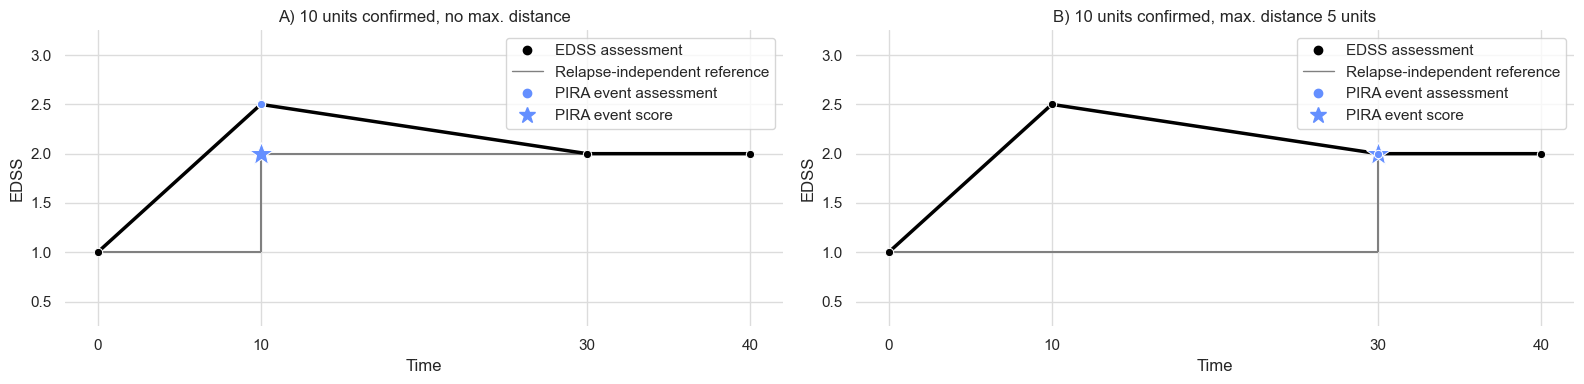

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 30, 40],
        "edss_score": [1, 2.5, 2.0, 2.0],
    }
)
for i, confirmation_setting in enumerate(
    [
        (np.inf, "A) 10 units confirmed, no max. distance"),
        (5, "B) 10 units confirmed, max. distance 5 units"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="fixed",
        opt_require_confirmation=True,
        opt_confirmation_time=10,
        opt_confirmation_time_right_side_max_tolerance=confirmation_setting[0],
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(confirmation_setting[1])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Confirmation over 10 units required. **A)** No right-hand constraint, i.e. the event at step 10 is confirmed
by the score at step 30. **B)** Maximal distance from the minimal confirmation distance of 5 units. The score at step
30, which is the first to satisfy the 10 units minimal distance, is more than 10 + 5 units from the event, thus it does
not qualify as confirmation score. However, the score at step 30 is a confirmed disability accrual with respect to
the baseline 1.0 since the score at step 40 satisfies the minimal and maximal confirmation distance requirements.

### Left-hand tolerance with right-hand constraint

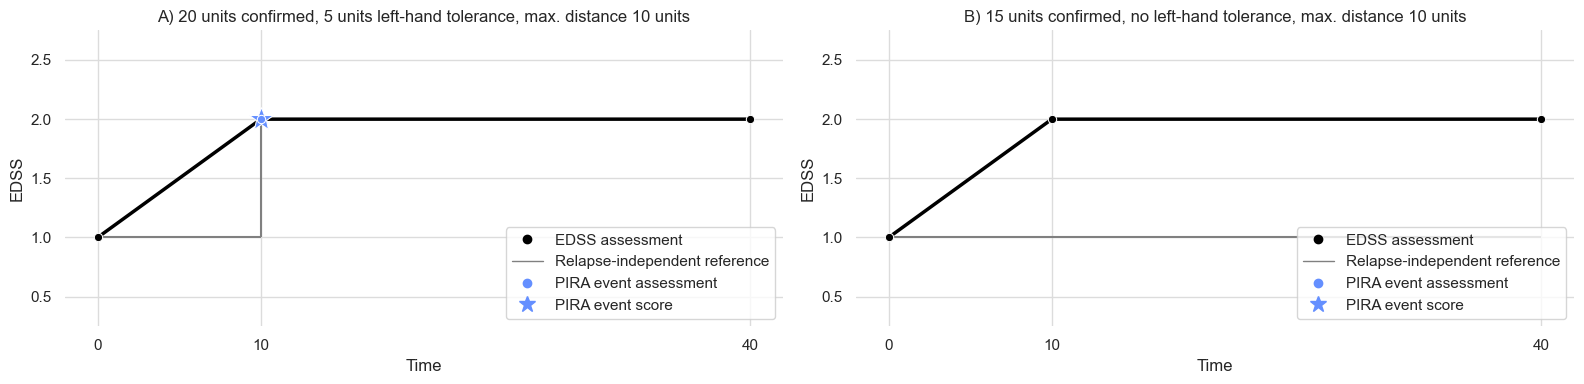

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 40],
        "edss_score": [1, 2.0, 2.0],
    }
)
for i, confirmation_setting in enumerate(
    [
        (20, 5, "A) 20 units confirmed, 5 units left-hand tolerance, max. distance 10 units"),
        (15, 0, "B) 15 units confirmed, no left-hand tolerance, max. distance 10 units"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="fixed",
        opt_require_confirmation=True,
        opt_confirmation_time=confirmation_setting[0],
        opt_confirmation_time_left_side_max_tolerance=confirmation_setting[1],
        opt_confirmation_time_right_side_max_tolerance=10,
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(confirmation_setting[2])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Combination of left-hand tolerance and right-hand constraint. **A)** 20 units confirmation with 5 units
tolerance. The maximal timestamp (right-hand constraint) for a confirmation assessment for an event at step 10 is
t<sub>i</sub> + Δt + constraint = 10 + 20 + 10 = 40, i.e. the assessment at step 40 is a valid confirmation assessment. **B)**
Reducing the minimal distance instead of allowing a left-hand tolerance yields a maximal timestamp t<sub>i</sub> + Δt +
constraint = 10 + 15 + 10 = 35, i.e. the assessment at step 40 is not a valid confirmation assessment.

### Sustained minimal duration

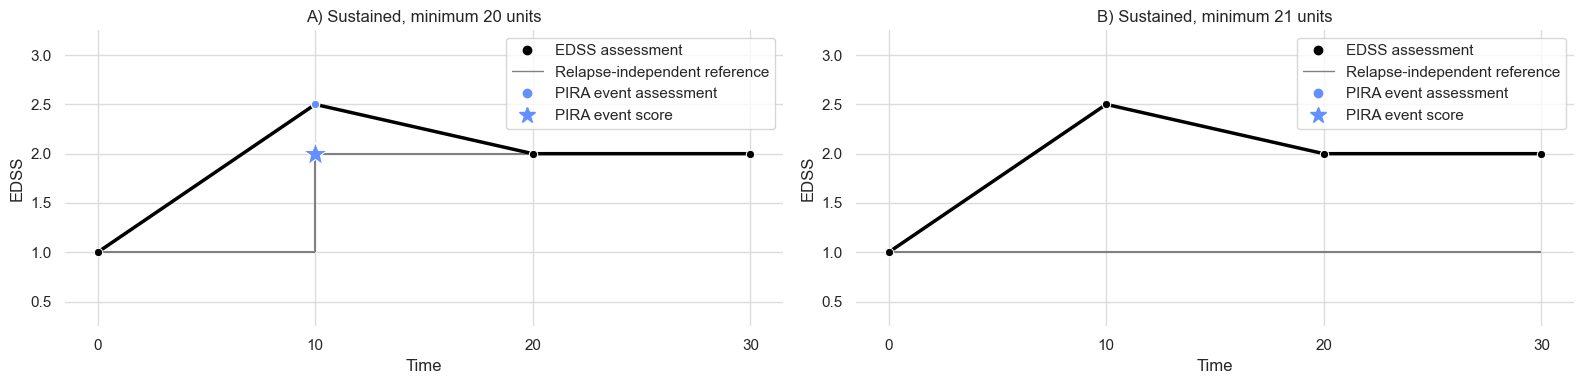

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30],
        "edss_score": [1, 2.5, 2.0, 2.0],
    }
)
for i, confirmation_setting in enumerate(
    [
        (20, "A) Sustained, minimum 20 units"),
        (21, "B) Sustained, minimum 21 units"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="fixed",
        opt_require_confirmation=True,
        opt_confirmation_time=-1,
        opt_confirmation_sustained_minimal_distance=confirmation_setting[0],
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(confirmation_setting[1])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Minimal duration requirement for sustained disability accrual. **A)** Minimum duration 20 units. This
condition is satisfied for the increase at step 10 as the assessment at step 30 satisfies t<sub>j</sub> ≥ t<sub>i</sub> + 
minimum duration = 10 + 20 = 30. **B)** Minimum duration 21 units. The increase at step 10 is not confirmed since there is 
no assessment with a timestamp t<sub>j</sub> that satisfies t<sub>j</sub> ≥ t<sub>i</sub> + minimum duration = 10 + 21 = 31. 
Minimum increase + 1.0, minimum condition.

### Why "last" is disabled for sustained, and a tale of caution when using "last" and a long confirmation interval

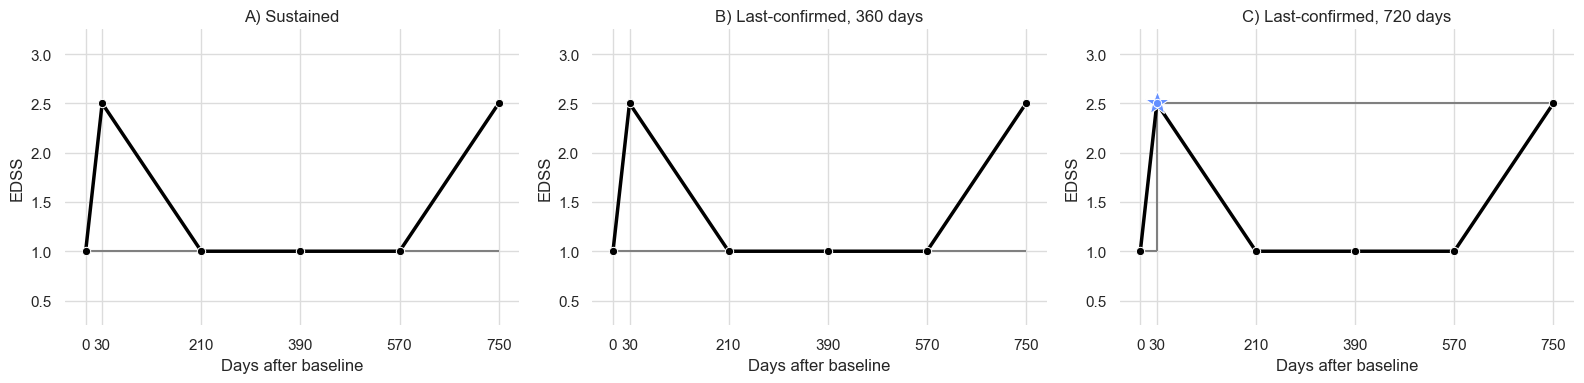

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 30, 210, 390, 570, 750],
        "edss_score": [1, 2.5, 1, 1, 1, 2.5],
    }
)
for i, confirmation_setting in enumerate(
    [
        (-1, "all", "A) Sustained"),
        (360, "last", "B) Last-confirmed, 360 days"),
        (720, "last", "C) Last-confirmed, 720 days"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="fixed",
        opt_require_confirmation=True,
        opt_confirmation_time=confirmation_setting[0],
        opt_confirmation_included_values=confirmation_setting[1],
        show_legend=False,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(confirmation_setting[2])
    axes[i].set_xlabel("Days after baseline")
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

## Last exempt

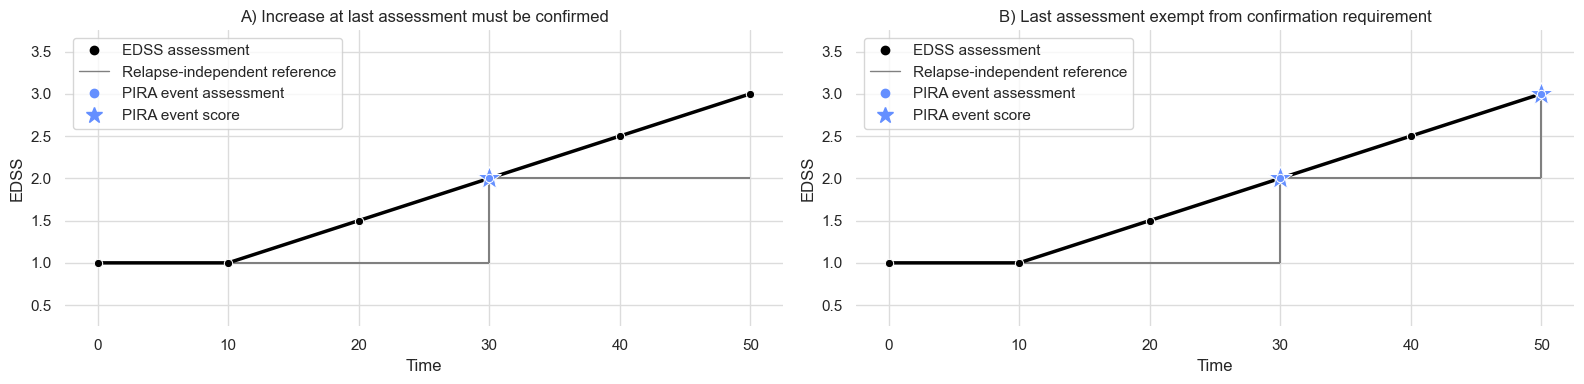

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
test_dataframe = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40, 50],
        "edss_score": [1, 1, 1.5, 2.0, 2.5, 3.0],
    }
)
for i, option in enumerate(
    [
        (True, "A) Increase at last assessment must be confirmed"),
        (False, "B) Last assessment exempt from confirmation requirement"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=test_dataframe,
        opt_require_confirmation=True,
        opt_confirmation_time=0.5,
        opt_confirmation_require_confirmation_for_last_visit=option[0],
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(option[1])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: **A)** All increases must be confirmed, thus the increase at step 50 does not qualify as disability accrual.
**B)** The last assessment is exempt from the confirmation requirement, thus the increase at step 50 qualifies as
disability accrual. Minimum increase + 1.0, next-confirmed.

# Minimal distance

## To previous

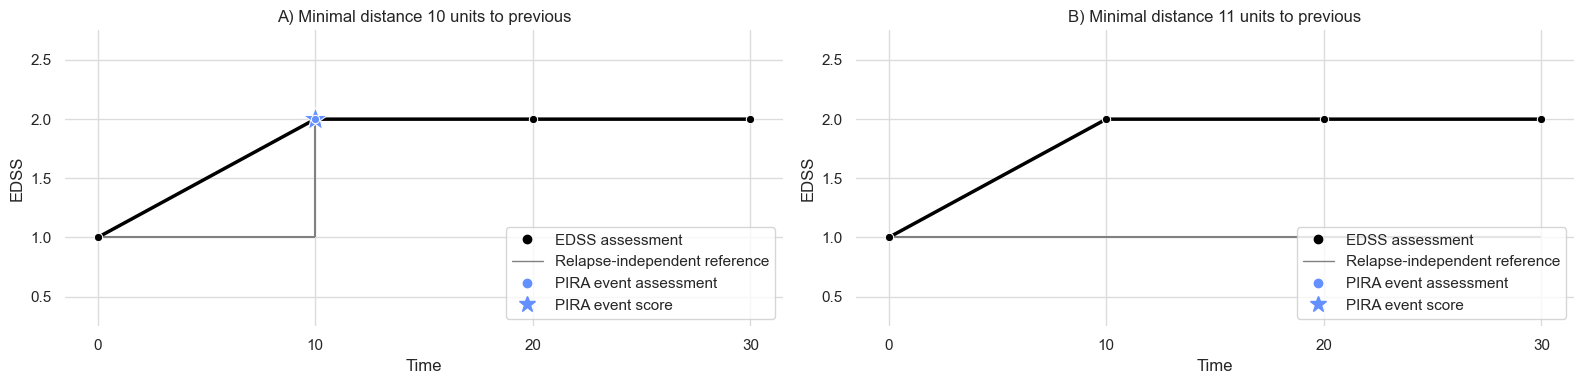

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30],
        "edss_score": [1, 2.0, 2.0, 2.0],
    }
)
for i, distance_setting in enumerate(
    [
        (10, "A) Minimal distance 10 units to previous"),
        (11, "B) Minimal distance 11 units to previous"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="fixed",
        opt_minimal_distance_time=distance_setting[0],
        opt_minimal_distance_type="previous",
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(distance_setting[1])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Minimal distance to the previous assessment. **A)** The increase at step 10 is ≥ 10 units from the last
assessment (step 0), thus it qualifies as a disability accrual event. **B)** The increase at step 10 is < 11 units from
the last assessment (step 0), thus it does not qualify as a disability accrual event.

## To reference

### Unconfirmed

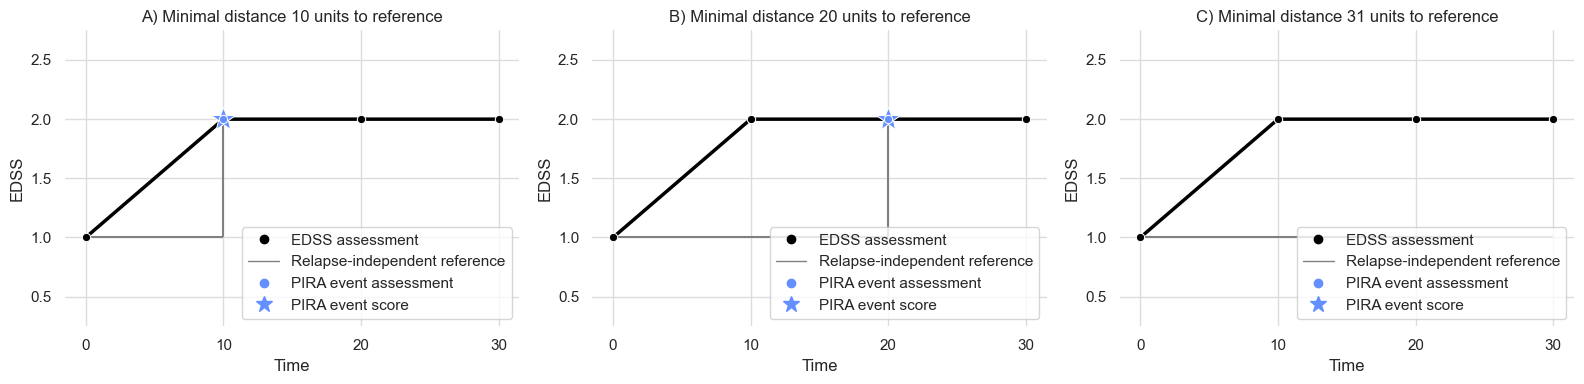

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30],
        "edss_score": [1, 2.0, 2.0, 2.0],
    }
)
for i, distance_setting in enumerate(
    [
        (10, "A) Minimal distance 10 units to reference"),
        (20, "B) Minimal distance 20 units to reference"),
        (31, "C) Minimal distance 31 units to reference"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="fixed",
        opt_minimal_distance_time=distance_setting[0],
        opt_minimal_distance_type="reference",
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(distance_setting[1])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Minimal distance to the reference, no confirmation requirement. **A)** Minimal distance 10 units. The
increase at step 10 is ≥ 10 units from the reference (step 0), thus it qualifies as a disability accrual event. **B)**
Minimal distance 20 units. The increase at step 10 is < 20 units from the last assessment (step 0), thus it does not
qualify as a disability accrual event. However, the score at step 20 satisfies the minimal increment and minimal
distance condition, thus it is a disability accrual event. **C)** Minimal distance 31 units. No assessment satisfies the
minimal distance to reference condition, thus there are no disability accrual events.

### Minimal distance to reference with confirmation

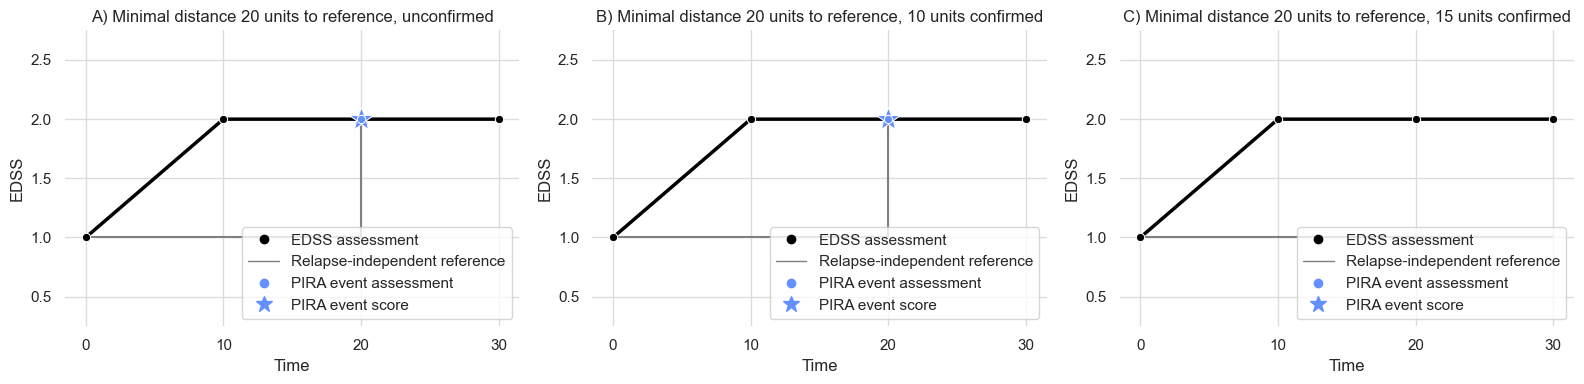

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30],
        "edss_score": [1, 2.0, 2.0, 2.0],
    }
)
for i, distance_setting in enumerate(
    [
        (False, 0, "A) Minimal distance 20 units to reference, unconfirmed"),
        (True, 10, "B) Minimal distance 20 units to reference, 10 units confirmed"),
        (True, 15, "C) Minimal distance 20 units to reference, 15 units confirmed"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="fixed",
        opt_minimal_distance_time=20,
        opt_minimal_distance_type="reference",
        opt_require_confirmation=distance_setting[0],
        opt_confirmation_time=distance_setting[1],
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(distance_setting[2])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Minimal distance to reference (20 units) and confirmation condition. **A)** The assessment at step 20 is
the first increase that satisfies the minimal distance condition. It does not require confirmation, thus it qualifies as
disability accrual. **B)** The assessment at step 20 is the first increase that satisfies the minimal distance condition,
and the assessment at step 30 satisfies the confirmation requirement of 10 units. **C)** The assessment at step 20 is
the first increase that satisfies the minimal distance condition, but it is not confirmed since there is no assessment
at time ≥ 20 + 15.

### Minimal distance to reference without backtracking

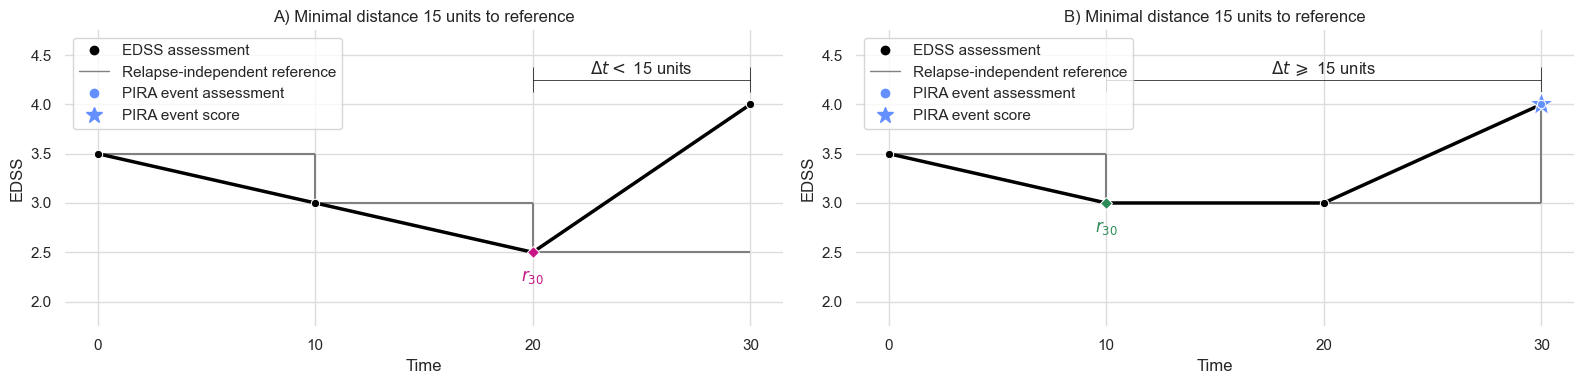

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_ups = [pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30],
        "edss_score": [3.5, 3.0, 2.5, 4.0],
    }
),pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30],
        "edss_score": [3.5, 3.0, 3.0, 4.0],
    }
)]
for i, distance_setting in enumerate(
    [
        "A) Minimal distance 15 units to reference",
        "B) Minimal distance 15 units to reference",
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_ups[i],
        opt_baseline_type="roving",
        opt_roving_reference_require_confirmation=False,
        opt_minimal_distance_time=15,
        opt_minimal_distance_type="reference",
        opt_minimal_distance_backtrack_decrease=False,
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(distance_setting)
    axes[i].set_yticks([2.0, 2.5, 3.0, 3.5, 4.0, 4.5])
    axes[i].set_ylim((1.75, 4.75))

axes[0].hlines(y=4.25, xmin=20, xmax=30, linewidth=.5, color="black")
axes[0].vlines(x=20, ymin=4.125, ymax=4.375, linewidth=.5, color="black")
axes[0].vlines(x=30, ymin=4.125, ymax=4.375, linewidth=.5, color="black")
axes[0].text(x=25, y=4.45, s=r"$\Delta t <$ 15 units", horizontalalignment="center", verticalalignment="top")
axes[0].text(x=20, y=2.25, s=r"$r_{30}$", horizontalalignment="center", verticalalignment="center", color="mediumvioletred")
sns.lineplot(
    data=example_follow_ups[0].query("days_after_baseline == 20"),
    x="days_after_baseline",
    y="edss_score",
    color="mediumvioletred",
    marker="D",
    legend=False,
    zorder=50,
    ax=axes[0],
)


axes[1].hlines(y=4.25, xmin=10, xmax=30, linewidth=.5, color="black")
axes[1].vlines(x=10, ymin=4.125, ymax=4.375, linewidth=.5, color="black")
axes[1].vlines(x=30, ymin=4.125, ymax=4.375, linewidth=.5, color="black")
axes[1].text(x=20, y=4.45, s=r"$\Delta t\, \geqslant$ 15 units", horizontalalignment="center", verticalalignment="top")
axes[1].text(x=10, y=2.75, s=r"$r_{30}$", horizontalalignment="center", verticalalignment="center", color="seagreen")
sns.lineplot(
    data=example_follow_ups[1].query("days_after_baseline == 10"),
    x="days_after_baseline",
    y="edss_score",
    color="seagreen",
    marker="D",
    legend=False,
    zorder=50,
    ax=axes[1],
)

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Minimal distance to reference with an unconfirmed roving reference. **A)** The score at step 20 qualifies
as a new roving reference for the event at step 30, thus the distance between the increase at step 30 and the
reference does not satisfy the minimal distance condition, and the increase at step 30 does not qualify as event.
**B)** The roving reference is last reset at step 10, thus the distance between the reference and the event candidate
at step 30 satisfies the minimal distance condition and the increase at step 30 qualifies as an event.

### Minimal distance to reference with backtracking

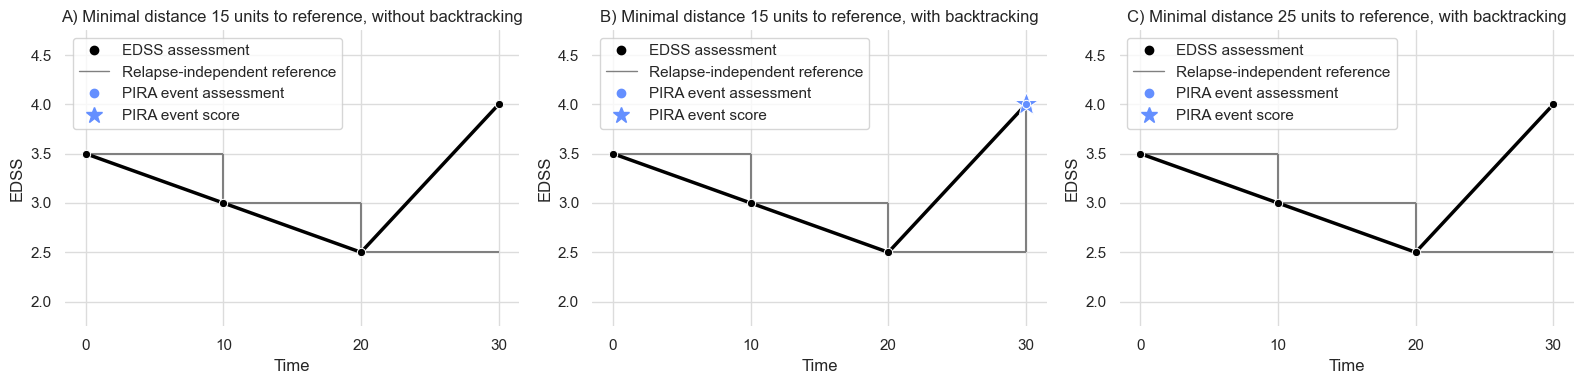

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30],
        "edss_score": [3.5, 3.0, 2.5, 4.0],
    }
)
for i, distance_setting in enumerate(
    [
        (15, False, "A) Minimal distance 15 units to reference, without backtracking"),
        (15, True, "B) Minimal distance 15 units to reference, with backtracking"),
        (25, True, "C) Minimal distance 25 units to reference, with backtracking"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="roving",
        opt_roving_reference_require_confirmation=False,
        opt_minimal_distance_time=distance_setting[0],
        opt_minimal_distance_type="reference",
        opt_minimal_distance_backtrack_decrease=distance_setting[1],
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(distance_setting[2])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Minimal distance to reference with a roving reference. **A)** The score at step 20 qualifies as a new
roving reference, thus the distance between the increase at step 30 and the reference does not satisfy the
minimal distance condition. However, the increase at step 30 would be an event if the score at step 20 was 3.0
instead of 2.5, because in this case the reference would be the score at step 10. **B)** With
backtracking, if there is a reference assessment with a score low enough for the increase at 30 to be an event
and that satisfies the minimal distance condition, the increase at step 30 qualifies as an event. This is the case for
the assessment at step 10. **C)** The last reference that would satisfy the minimal distance condition (the
assessment at step 0) is not low enough for the score at step 30 to count as an event.

### Minimal distance to reference with backtracking and confirmation

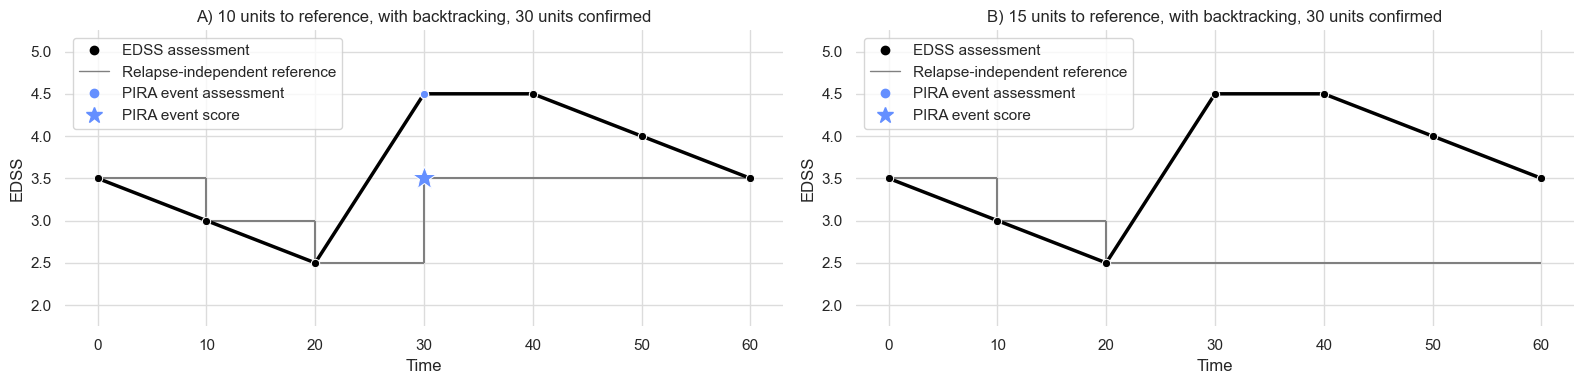

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40, 50, 60],
        "edss_score": [3.5, 3.0, 2.5, 4.5, 4.5, 4.0, 3.5],
    }
)
for i, distance_setting in enumerate(
    [
        (10, "A) 10 units to reference, with backtracking, 30 units confirmed"),
        (15, "B) 15 units to reference, with backtracking, 30 units confirmed"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="roving",
        opt_roving_reference_require_confirmation=False,
        opt_minimal_distance_time=distance_setting[0],
        opt_minimal_distance_type="reference",
        opt_minimal_distance_backtrack_decrease=True,
        opt_require_confirmation=True,
        opt_confirmation_time=30,

        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(distance_setting[1])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Minimal distance to reference with backtracking and confirmation over 30 units, minimal increase +
1.0. **A)** Minimal distance 10 units, thus the score 2.5 at step 20 is the reference for the increase at step 30. The
confirmation scores at steps 40, 50, and 60 all satisfy the confirmation condition score ≥ 2.5 + 1, thus the increase
at step 30 is confirmed disability accrual. **B)** Minimal distance 15 units, thus the reference for the increase is the
assessment at step 10 with score 3.0. Since the assessment at step 60 does not satisfy the confirmation condition
score ≥ 3.0 + 1, the increase at step 30 is not confirmed.

# Post-event re-baselining

## With fixed baseline

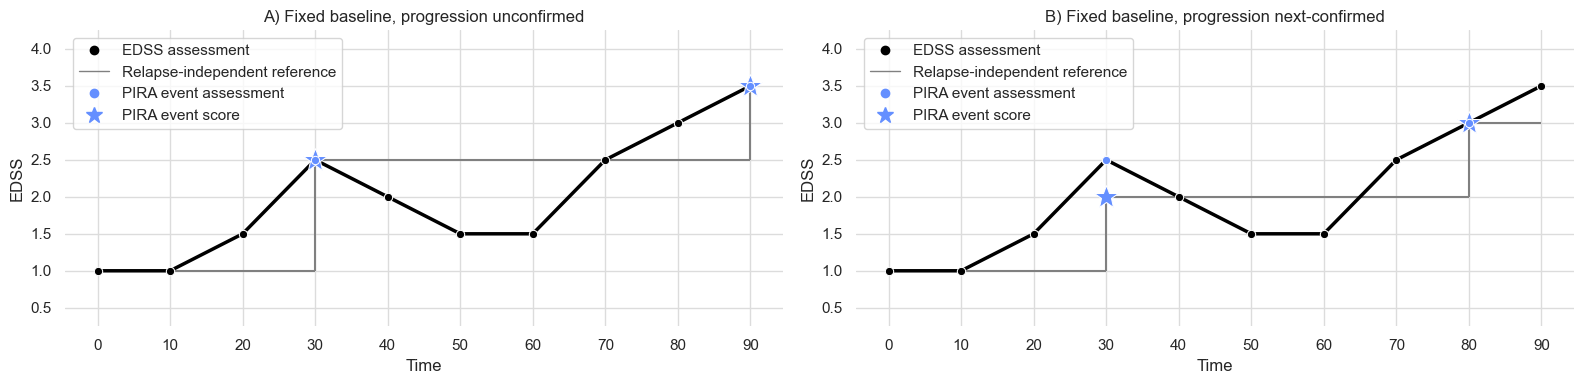

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_up = pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
            "edss_score": [1, 1, 1.5, 2.5, 2.0, 1.5, 1.5, 2.5, 3.0, 3.5],
        }
    )
for i, baseline_setting in enumerate(
    [
        (False, 0, "A) Fixed baseline, progression unconfirmed"),
        (True, 0.5, "B) Fixed baseline, progression next-confirmed"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="fixed",
        opt_roving_reference_require_confirmation=False,  
        opt_require_confirmation=baseline_setting[0],
        opt_confirmation_time=baseline_setting[1],    
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(baseline_setting[2])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Post-event re-baselining. After a disability accrual event, the reference is reset to the confirmed event
score. **A)** No confirmation requirement, thus the event score of the PIRA event at day 30 is 2.5. **B)** The event
must be confirmed at the next assessment, thus the confirmed event score is 2.0.

## With roving reference

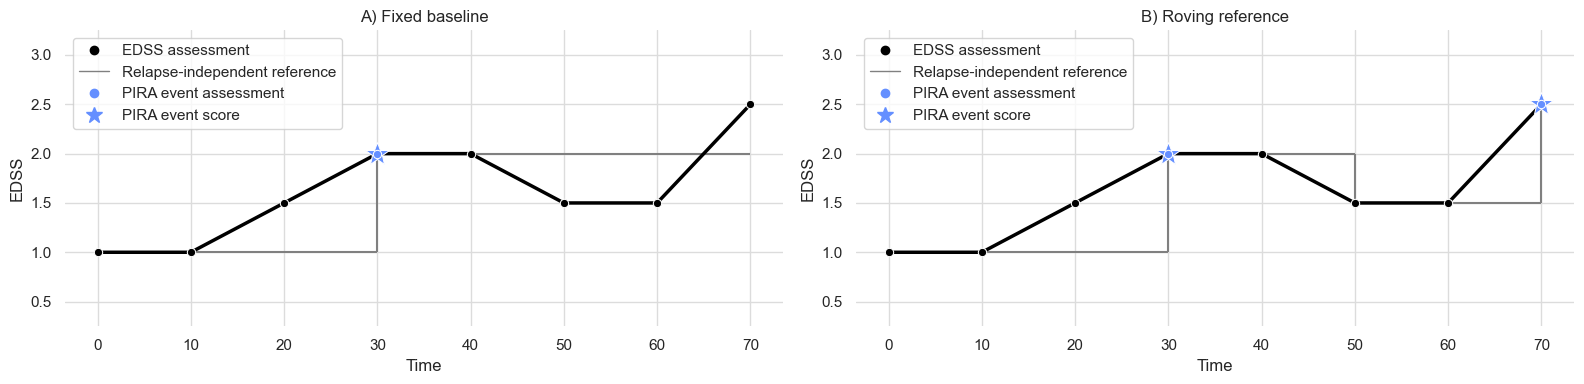

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_up = pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70],
            "edss_score": [1, 1, 1.5, 2.0, 2.0, 1.5, 1.5, 2.5],
        }
    )
for i, baseline_setting in enumerate(
    [
        ("fixed", "A) Fixed baseline"),
        ("roving", "B) Roving reference"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type=baseline_setting[0],
        opt_roving_reference_require_confirmation=False,        
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(baseline_setting[1])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Post-event re-baselining. **A)** Fixed baseline. The post-event reference stays at the confirmed event
score 2.0. **B)** Roving reference. The score at step 50 qualifies as a new roving reference, thus the reference for
subsequent event candidates is 1.5. Minimal increase + 1.0, next-confirmed roving reference, no confirmation for
disability accrual required.

### Minimal distance and backtracking

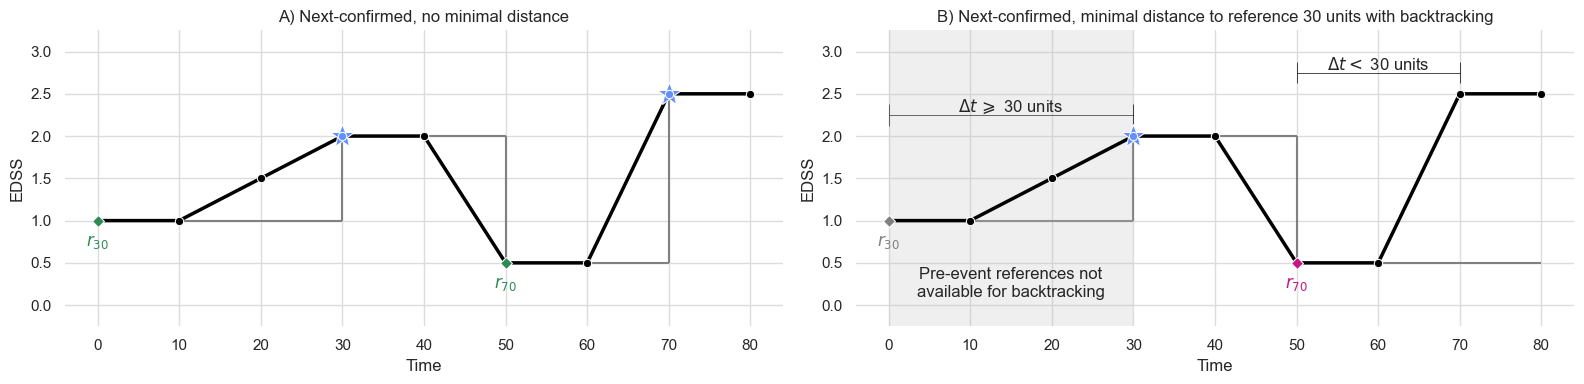

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_up = pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70, 80],
            "edss_score": [1, 1, 1.5, 2.0, 2.0, 0.5, 0.5, 2.5, 2.5],
        }
    )
for i, baseline_setting in enumerate(
    [
        (0, "A) Next-confirmed, no minimal distance"),
        (30, "B) Next-confirmed, minimal distance to reference 30 units with backtracking"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        opt_baseline_type="roving",
        opt_roving_reference_require_confirmation=False,    
        opt_require_confirmation=True,
        opt_confirmation_time=0.5,
        opt_minimal_distance_type="reference",
        opt_minimal_distance_time=baseline_setting[0],
        opt_minimal_distance_backtrack_decrease=True,
        show_legend=False,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(baseline_setting[1])

axes[0].text(x=0, y=0.75, s=r"$r_{30}$", horizontalalignment="center", verticalalignment="center", color="seagreen")
axes[0].text(x=50, y=0.25, s=r"$r_{70}$", horizontalalignment="center", verticalalignment="center", color="seagreen")
sns.lineplot(
    data=example_follow_up.query("days_after_baseline == 0 or days_after_baseline == 50"),
    x="days_after_baseline",
    y="edss_score",
    color="seagreen",
    marker="D",
    legend=False,
    linewidth=0,
    zorder=50,
    ax=axes[0],
)

axes[1].hlines(y=2.25, xmin=0, xmax=30, linewidth=.5, color="black")
axes[1].vlines(x=0, ymin=2.125, ymax=2.375, linewidth=.5, color="black")
axes[1].vlines(x=30, ymin=2.125, ymax=2.375, linewidth=.5, color="black")
axes[1].text(x=15, y=2.45, s=r"$\Delta t\, \geqslant$ 30 units", horizontalalignment="center", verticalalignment="top")

axes[1].hlines(y=2.75, xmin=50, xmax=70, linewidth=.5, color="black")
axes[1].vlines(x=50, ymin=2.625, ymax=2.875, linewidth=.5, color="black")
axes[1].vlines(x=70, ymin=2.625, ymax=2.875, linewidth=.5, color="black")
axes[1].text(x=60, y=2.95, s=r"$\Delta t <$ 30 units", horizontalalignment="center", verticalalignment="top")

axes[1].text(x=0, y=0.75, s=r"$r_{30}$", horizontalalignment="center", verticalalignment="center", color="grey")
axes[1].text(x=50, y=0.25, s=r"$r_{70}$", horizontalalignment="center", verticalalignment="center", color="mediumvioletred", zorder=51)
sns.lineplot(
    data=example_follow_up.query("days_after_baseline == 0"),
    x="days_after_baseline",
    y="edss_score",
    color="grey",
    marker="D",
    legend=False,
    linewidth=0,
    zorder=50,
    ax=axes[1],
)
sns.lineplot(
    data=example_follow_up.query("days_after_baseline == 50"),
    x="days_after_baseline",
    y="edss_score",
    color="mediumvioletred",
    marker="D",
    legend=False,
    linewidth=0,
    zorder=50,
    ax=axes[1],
)
axes[1].axvspan(
    0,
    30,
    ymin=0.0,
    ymax=3.0,
    linewidth=0,
    alpha=0.25,
    color="silver",
    zorder=2,
)
axes[1].text(x=15, y=0.45, s="Pre-event references not\navailable for backtracking", horizontalalignment="center", verticalalignment="top")

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

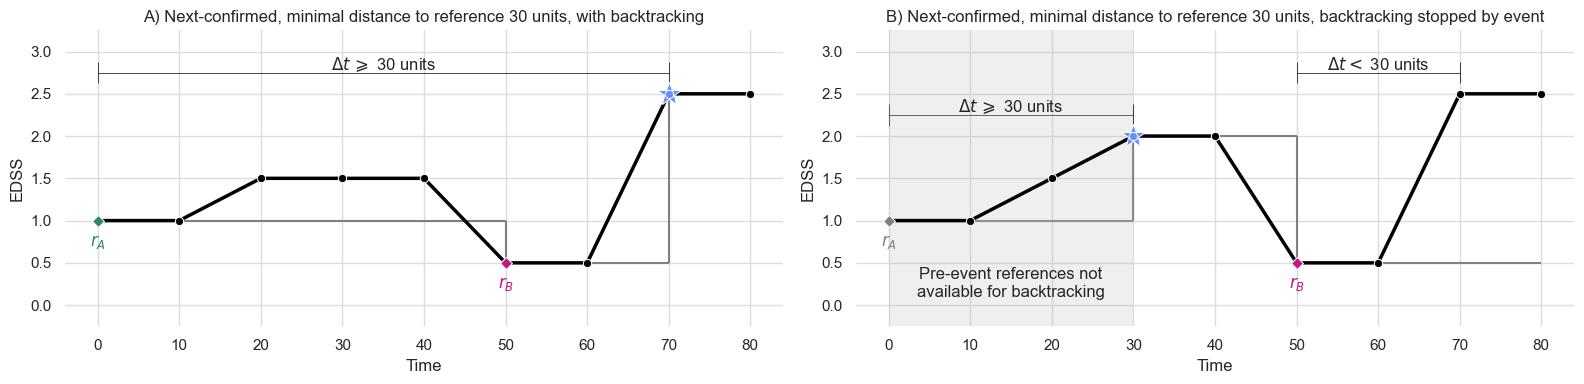

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_ups = [
    pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70, 80],
            "edss_score": [1, 1, 1.5, 1.5, 1.5, 0.5, 0.5, 2.5, 2.5],
        }
    ),
    pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70, 80],
            "edss_score": [1, 1, 1.5, 2.0, 2.0, 0.5, 0.5, 2.5, 2.5],
        }
    ),
]
for i, baseline_setting in enumerate(
    [
        "A) Next-confirmed, minimal distance to reference 30 units, with backtracking",
        "B) Next-confirmed, minimal distance to reference 30 units, backtracking stopped by event",
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_ups[i],
        opt_baseline_type="roving",
        opt_roving_reference_require_confirmation=False,
        opt_require_confirmation=True,
        opt_confirmation_time=0.5,
        opt_minimal_distance_type="reference",
        opt_minimal_distance_time=30,
        opt_minimal_distance_backtrack_decrease=True,
        show_legend=False,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(baseline_setting)

axes[0].hlines(y=2.75, xmin=0, xmax=70, linewidth=0.5, color="black")
axes[0].vlines(x=0, ymin=2.625, ymax=2.875, linewidth=0.5, color="black")
axes[0].vlines(x=70, ymin=2.625, ymax=2.875, linewidth=0.5, color="black")
axes[0].text(
    x=35,
    y=2.95,
    s=r"$\Delta t\, \geqslant$ 30 units",
    horizontalalignment="center",
    verticalalignment="top",
)
axes[0].text(
    x=0,
    y=0.75,
    s=r"$r_{A}$",
    horizontalalignment="center",
    verticalalignment="center",
    color="seagreen",
)
axes[0].text(
    x=50,
    y=0.25,
    s=r"$r_{B}$",
    horizontalalignment="center",
    verticalalignment="center",
    color="mediumvioletred",
)
sns.lineplot(
    data=example_follow_up.query("days_after_baseline == 0"),
    x="days_after_baseline",
    y="edss_score",
    color="seagreen",
    marker="D",
    legend=False,
    linewidth=0,
    zorder=50,
    ax=axes[0],
)
sns.lineplot(
    data=example_follow_up.query("days_after_baseline == 50"),
    x="days_after_baseline",
    y="edss_score",
    color="mediumvioletred",
    marker="D",
    legend=False,
    linewidth=0,
    zorder=50,
    ax=axes[0],
)

axes[1].hlines(y=2.25, xmin=0, xmax=30, linewidth=0.5, color="black")
axes[1].vlines(x=0, ymin=2.125, ymax=2.375, linewidth=0.5, color="black")
axes[1].vlines(x=30, ymin=2.125, ymax=2.375, linewidth=0.5, color="black")
axes[1].text(
    x=15,
    y=2.45,
    s=r"$\Delta t\, \geqslant$ 30 units",
    horizontalalignment="center",
    verticalalignment="top",
)

axes[1].hlines(y=2.75, xmin=50, xmax=70, linewidth=0.5, color="black")
axes[1].vlines(x=50, ymin=2.625, ymax=2.875, linewidth=0.5, color="black")
axes[1].vlines(x=70, ymin=2.625, ymax=2.875, linewidth=0.5, color="black")
axes[1].text(
    x=60,
    y=2.95,
    s=r"$\Delta t <$ 30 units",
    horizontalalignment="center",
    verticalalignment="top",
)

axes[1].text(
    x=0,
    y=0.75,
    s=r"$r_{A}$",
    horizontalalignment="center",
    verticalalignment="center",
    color="grey",
)
axes[1].text(
    x=50,
    y=0.25,
    s=r"$r_{B}$",
    horizontalalignment="center",
    verticalalignment="center",
    color="mediumvioletred",
    zorder=51,
)
sns.lineplot(
    data=example_follow_up.query("days_after_baseline == 0"),
    x="days_after_baseline",
    y="edss_score",
    color="grey",
    marker="D",
    legend=False,
    linewidth=0,
    zorder=50,
    ax=axes[1],
)
sns.lineplot(
    data=example_follow_up.query("days_after_baseline == 50"),
    x="days_after_baseline",
    y="edss_score",
    color="mediumvioletred",
    marker="D",
    legend=False,
    linewidth=0,
    zorder=50,
    ax=axes[1],
)
axes[1].axvspan(
    0,
    30,
    ymin=0.0,
    ymax=3.0,
    linewidth=0,
    alpha=0.25,
    color="silver",
    zorder=2,
)
axes[1].text(
    x=15,
    y=0.45,
    s="Pre-event references not\navailable for backtracking",
    horizontalalignment="center",
    verticalalignment="top",
)

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

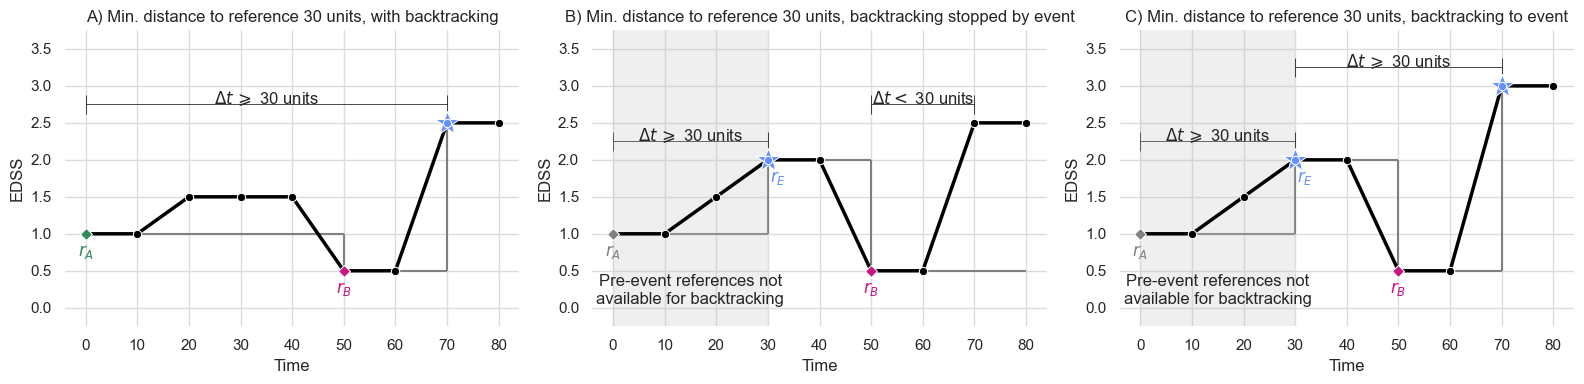

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
example_follow_ups = [
    pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70, 80],
            "edss_score": [1, 1, 1.5, 1.5, 1.5, 0.5, 0.5, 2.5, 2.5],
        }
    ),
    pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70, 80],
            "edss_score": [1, 1, 1.5, 2.0, 2.0, 0.5, 0.5, 2.5, 2.5],
        }
    ),
    pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70, 80],
            "edss_score": [1, 1, 1.5, 2.0, 2.0, 0.5, 0.5, 3.0, 3.0],
        }
    ),
]
for i, baseline_setting in enumerate(
    [

        "A) Min. distance to reference 30 units, with backtracking",
        "B) Min. distance to reference 30 units, backtracking stopped by event",
        "C) Min. distance to reference 30 units, backtracking to event",
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_ups[i],
        opt_baseline_type="roving",
        opt_roving_reference_require_confirmation=False,
        opt_require_confirmation=True,
        opt_confirmation_time=0.5,
        opt_minimal_distance_type="reference",
        opt_minimal_distance_time=30,
        opt_minimal_distance_backtrack_decrease=True,
        show_legend=False,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(baseline_setting)
    axes[i].set_ylim((-0.25, 3.75))
    axes[i].set_yticks([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5])

axes[0].hlines(y=2.75, xmin=0, xmax=70, linewidth=0.5, color="black")
axes[0].vlines(x=0, ymin=2.625, ymax=2.875, linewidth=0.5, color="black")
axes[0].vlines(x=70, ymin=2.625, ymax=2.875, linewidth=0.5, color="black")
axes[0].text(
    x=35,
    y=2.95,
    s=r"$\Delta t\, \geqslant$ 30 units",
    horizontalalignment="center",
    verticalalignment="top",
)
axes[0].text(
    x=0,
    y=0.75,
    s=r"$r_{A}$",
    horizontalalignment="center",
    verticalalignment="center",
    color="seagreen",
)
axes[0].text(
    x=50,
    y=0.25,
    s=r"$r_{B}$",
    horizontalalignment="center",
    verticalalignment="center",
    color="mediumvioletred",
)
sns.lineplot(
    data=example_follow_up.query("days_after_baseline == 0"),
    x="days_after_baseline",
    y="edss_score",
    color="seagreen",
    marker="D",
    legend=False,
    linewidth=0,
    zorder=50,
    ax=axes[0],
)
sns.lineplot(
    data=example_follow_up.query("days_after_baseline == 50"),
    x="days_after_baseline",
    y="edss_score",
    color="mediumvioletred",
    marker="D",
    legend=False,
    linewidth=0,
    zorder=50,
    ax=axes[0],
)

axes[1].hlines(y=2.25, xmin=0, xmax=30, linewidth=0.5, color="black")
axes[1].vlines(x=0, ymin=2.125, ymax=2.375, linewidth=0.5, color="black")
axes[1].vlines(x=30, ymin=2.125, ymax=2.375, linewidth=0.5, color="black")
axes[1].text(
    x=15,
    y=2.45,
    s=r"$\Delta t\, \geqslant$ 30 units",
    horizontalalignment="center",
    verticalalignment="top",
)

axes[1].hlines(y=2.75, xmin=50, xmax=70, linewidth=0.5, color="black")
axes[1].vlines(x=50, ymin=2.625, ymax=2.875, linewidth=0.5, color="black")
axes[1].vlines(x=70, ymin=2.625, ymax=2.875, linewidth=0.5, color="black")
axes[1].text(
    x=60,
    y=2.95,
    s=r"$\Delta t <$ 30 units",
    horizontalalignment="center",
    verticalalignment="top",
)

axes[1].text(
    x=0,
    y=0.75,
    s=r"$r_{A}$",
    horizontalalignment="center",
    verticalalignment="center",
    color="grey",
)
axes[1].text(
    x=32,
    y=1.75,
    s=r"$r_{E}$",
    horizontalalignment="center",
    verticalalignment="center",
    color="#648FFF",
    zorder=51,
)
axes[1].text(
    x=50,
    y=0.25,
    s=r"$r_{B}$",
    horizontalalignment="center",
    verticalalignment="center",
    color="mediumvioletred",
    zorder=51,
)
sns.lineplot(
    data=example_follow_up.query("days_after_baseline == 0"),
    x="days_after_baseline",
    y="edss_score",
    color="grey",
    marker="D",
    legend=False,
    linewidth=0,
    zorder=50,
    ax=axes[1],
)
sns.lineplot(
    data=example_follow_up.query("days_after_baseline == 50"),
    x="days_after_baseline",
    y="edss_score",
    color="mediumvioletred",
    marker="D",
    legend=False,
    linewidth=0,
    zorder=50,
    ax=axes[1],
)
axes[1].axvspan(
    0,
    30,
    ymin=0.0,
    ymax=3.0,
    linewidth=0,
    alpha=0.25,
    color="silver",
    zorder=2,
)
axes[1].text(
    x=15,
    y=0.45,
    s="Pre-event references not\navailable for backtracking",
    horizontalalignment="center",
    verticalalignment="top",
)

axes[2].hlines(y=2.25, xmin=0, xmax=30, linewidth=0.5, color="black")
axes[2].vlines(x=0, ymin=2.125, ymax=2.375, linewidth=0.5, color="black")
axes[2].vlines(x=30, ymin=2.125, ymax=2.375, linewidth=0.5, color="black")
axes[2].text(
    x=15,
    y=2.45,
    s=r"$\Delta t\, \geqslant$ 30 units",
    horizontalalignment="center",
    verticalalignment="top",
)

axes[2].hlines(y=3.25, xmin=30, xmax=70, linewidth=0.5, color="black")
axes[2].vlines(x=30, ymin=3.125, ymax=3.375, linewidth=0.5, color="black")
axes[2].vlines(x=70, ymin=3.125, ymax=3.375, linewidth=0.5, color="black")
axes[2].text(
    x=50,
    y=3.45,
    s=r"$\Delta t\, \geqslant$ 30 units",
    horizontalalignment="center",
    verticalalignment="top",
)

axes[2].text(
    x=0,
    y=0.75,
    s=r"$r_{A}$",
    horizontalalignment="center",
    verticalalignment="center",
    color="grey",
)
axes[2].text(
    x=32,
    y=1.75,
    s=r"$r_{E}$",
    horizontalalignment="center",
    verticalalignment="center",
    color="#648FFF",
    zorder=51,
)
axes[2].text(
    x=50,
    y=0.25,
    s=r"$r_{B}$",
    horizontalalignment="center",
    verticalalignment="center",
    color="mediumvioletred",
    zorder=51,
)
sns.lineplot(
    data=example_follow_up.query("days_after_baseline == 0"),
    x="days_after_baseline",
    y="edss_score",
    color="grey",
    marker="D",
    legend=False,
    linewidth=0,
    zorder=50,
    ax=axes[2],
)
sns.lineplot(
    data=example_follow_up.query("days_after_baseline == 50"),
    x="days_after_baseline",
    y="edss_score",
    color="mediumvioletred",
    marker="D",
    legend=False,
    linewidth=0,
    zorder=50,
    ax=axes[2],
)
axes[2].axvspan(
    0,
    30,
    ymin=0.0,
    ymax=3.0,
    linewidth=0,
    alpha=0.25,
    color="silver",
    zorder=2,
)
axes[2].text(
    x=15,
    y=0.45,
    s="Pre-event references not\navailable for backtracking",
    horizontalalignment="center",
    verticalalignment="top",
)

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Minimal distance to reference 30 units with backtracking, next-confirmed event, minimal increase over
reference + 1.0. **A)** The new reference r B at step 50 is too close to the increase at step 70, but backtracking allows
using the previous reference r<sub>A</sub>, thus the increase at step 70 qualifies as an event. **B)** The increase at step 30
qualifies as confirmed disability accrual with respect to the initial baseline r<sub>A</sub>, thus the baseline is set to the
confirmed event score 2.0. The references available for the increase at step 70 are r<sub>B</sub> and r<sub>E</sub> (the reference set at
the event), but r<sub>B</sub> is too close and r<sub>E</sub> is not low enough, thus the increase at step 70 does not qualify as an event.
**C)** The increase at step 30 qualifies as confirmed disability accrual with respect to the initial baseline r<sub>A</sub>, thus the
baseline is set to the confirmed event score 2.0. The references available for the increase at step 70 are r<sub>B</sub> and r<sub>E</sub>
(the reference set at the event). While r<sub>B</sub> is too close, r<sub>E</sub> satisfies the minimal distance condition and is low
enough, thus the increase at step 70 qualifies as an event.

# Event merging

## Maximal merging distance

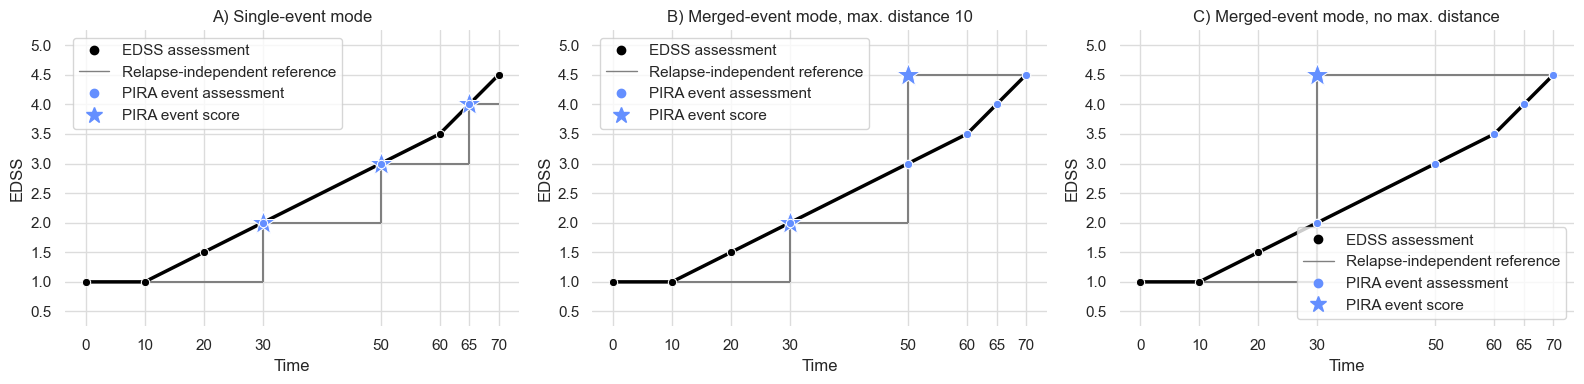

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for i, elt in enumerate(
    [
        (False, 0, "A) Single-event mode"),
        (True, 10, "B) Merged-event mode, max. distance 10"),
        (True, np.inf, "C) Merged-event mode, no max. distance"),
    ]
):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=pd.DataFrame(
            {
                "days_after_baseline": [0, 10, 20, 30, 50, 60, 65, 70],
                "edss_score": [1, 1, 1.5, 2.0, 3.0, 3.5, 4.0, 4.5],
            }
        ),
        merge_continuous_events=elt[0],
        continuous_events_max_repetition_time=5,
        continuous_events_max_merge_distance=elt[1],
        opt_require_confirmation=False,
        opt_confirmation_time=0.5,
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(elt[2])
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Examples for merging events. **A)** Single-event mode, i.e. no merging. Three events with an event
ΔEDSS of 1.0 each. **B)** Merged mode with a maximal merge distance of 10 units. Two events, one with event
ΔEDSS 1.0, one with event ΔEDSS 2.5 points. **C)** Merged mode without maximal merge distance. One event with
ΔEDSS 3.5 points.

## Maximal repetition distance

### One stagnation event

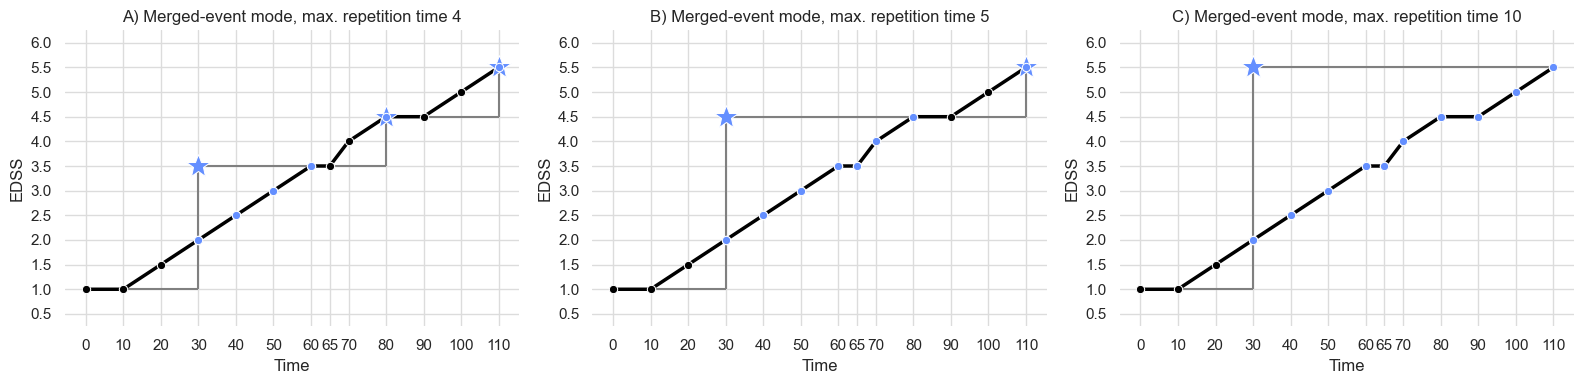

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for i, elt in enumerate([
        (4, "A) Merged-event mode, max. repetition time 4"), 
        (5, "B) Merged-event mode, max. repetition time 5"),
        (10, "C) Merged-event mode, max. repetition time 10"),
    ]):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=pd.DataFrame(
            {
                "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 65, 70, 80, 90, 100, 110],
                "edss_score": [1, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 3.5, 4.0, 4.5, 4.5, 5.0, 5.5],
            }
        ),
        relapse_timestamps=[],
        merge_continuous_events=True,
        continuous_events_max_repetition_time=elt[0],
        show_legend=False,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(elt[1])

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Maximal repetition time. **A)** Assessments with a distance &gt; 4 units are treated as stabilization, thus the
event merging ends at step 60. **B)** Assessments with a distance &gt; 5 units are treated as stabilization, thus the
event merging ends at step 80. **C)** Assessments with a distance &gt; 10 units are treated as stabilization, thus all
events are merged into one.

### Multiple stagnation events

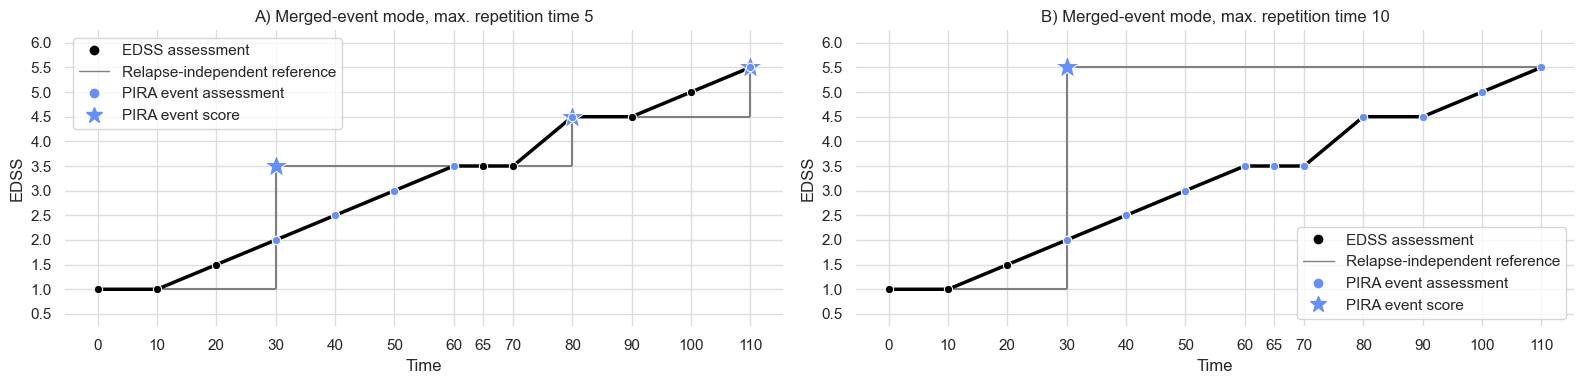

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
for i, elt in enumerate([
        (5, "A) Merged-event mode, max. repetition time 5"),
        (10, "B) Merged-event mode, max. repetition time 10"),
    ]):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=pd.DataFrame(
            {
                "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 65, 70, 80, 90, 100, 110],
                "edss_score": [1, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 3.5, 3.5, 4.5, 4.5, 5.0, 5.5],
            }
        ),
        relapse_timestamps=[],
        merge_continuous_events=True,
        continuous_events_max_repetition_time=elt[0],
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(elt[1])

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Event merging. **A)** Max. repetition time 5 units. The assessment at step 65 qualifies as a repetition
measurement for the event at step 60, but the assessment at step 70 does not, thus the merging process ends.
**B)** Max. repetition time 10 units. The assessments at steps 65 and 70 both qualify as repetition measurement,
and the next score is again an increase with respect to the previous confirmed score, so the merging continues.

### Stagnation at the end

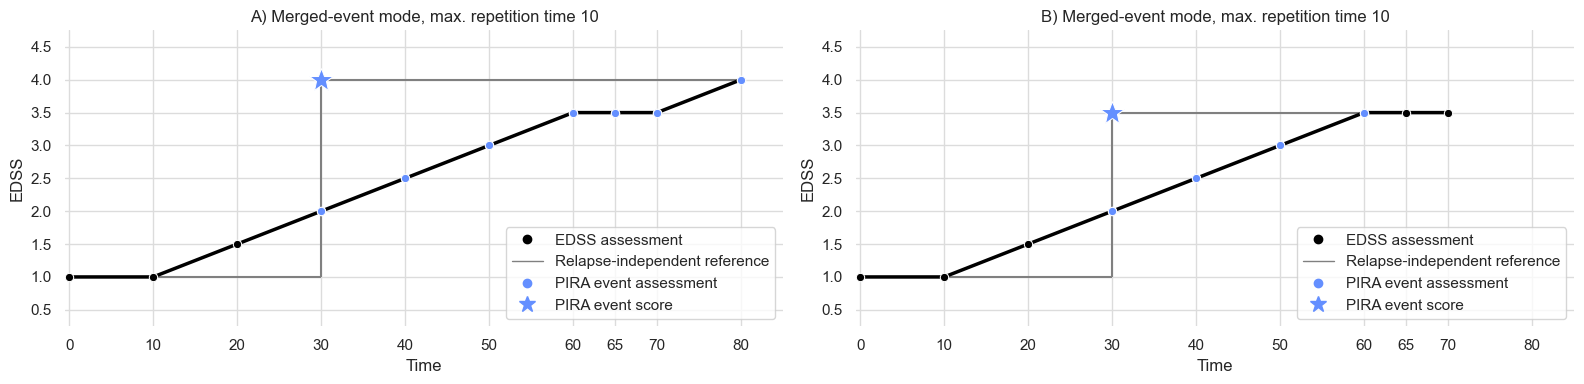

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_ups = [pd.DataFrame(
            {
                "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 65, 70, 80],
                "edss_score": [1, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 3.5, 3.5, 4.0],
            }
        ),pd.DataFrame(
            {
                "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 65, 70],
                "edss_score": [1, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 3.5, 3.5],
            }
        ),]
for i, elt in enumerate([
        "A) Merged-event mode, max. repetition time 10",
        "B) Merged-event mode, max. repetition time 10",
    ]):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_ups[i],
        relapse_timestamps=[],
        merge_continuous_events=True,
        continuous_events_max_repetition_time=10,
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(elt)
    axes[i].set_ylim((0.25, 4.75))
    axes[i].set_yticks([0.5 * i for i in range(1,10)])
    axes[i].set_xlim((-0.5, 85))
    axes[i].set_xticks([0, 10, 20, 30, 40, 50, 60, 65, 70, 80])

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Event merging, max. repetition time 10 units. **A)** The assessments at steps 65 and 70 both qualify as
repetition measurement, and the score at the next assessment is again an increase with respect to the previous
confirmed score, so the merging continues. **B)** The assessments at steps 65 and 70 both qualify as repetition
measurement, but they are not followed by an increase, so the merging terminates at the last increase at step 60.

## Short-term improvements

### With and without confirmation

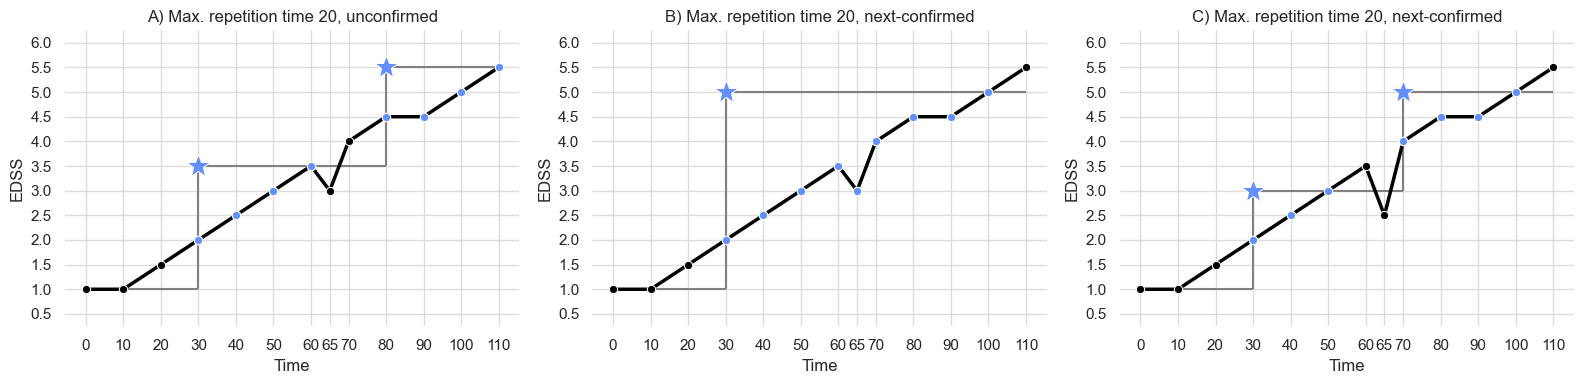

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
example_follow_ups = [
    pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 65, 70, 80, 90, 100, 110],
            "edss_score": [1, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 3.0, 4.0, 4.5, 4.5, 5.0, 5.5],
        }
    ),
    pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 65, 70, 80, 90, 100, 110],
            "edss_score": [1, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 3.0, 4.0, 4.5, 4.5, 5.0, 5.5],
        }
    ),
    pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 65, 70, 80, 90, 100, 110],
            "edss_score": [1, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 2.5, 4.0, 4.5, 4.5, 5.0, 5.5],
        }
    )
]
for i, elt in enumerate([
        (False, 0, "A) Max. repetition time 20, unconfirmed"),
        (True, 0.5, "B) Max. repetition time 20, next-confirmed"),
        (True, 0.5, "C) Max. repetition time 20, next-confirmed"),
    ]):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_ups[i],
        relapse_timestamps=[],
        merge_continuous_events=True,
        continuous_events_max_repetition_time=20,
        opt_require_confirmation=elt[0],
        opt_confirmation_time=elt[1],
        show_legend=False,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(elt[2])

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Event merging, max. repetition distance 20 units. **A)** Unconfirmed disability accrual. The confirmed
score at step 60 is thus 3.5, and the merging stops because the following score is lower. **B)** Next-confirmed
disability accrual. The confirmed score at step 60 is 3.0, thus the event at step 65 with confirmed score 3.0 is
considered a repetition measurement and the merging continues. **C)** The score at step 65 is lower than the
confirmed score from step 60, so the merging is terminated.

### Effect of confirmed score

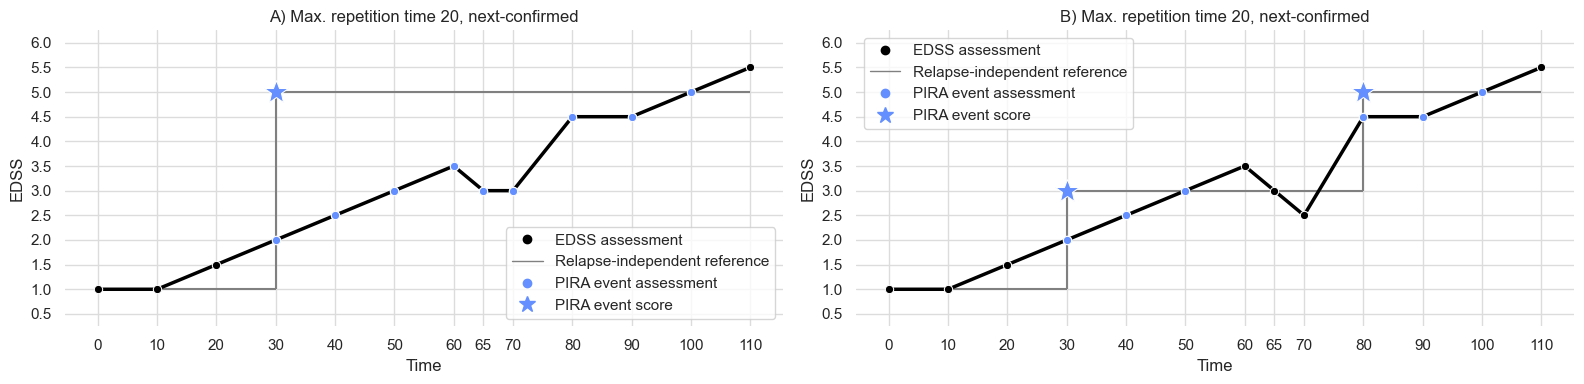

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_ups = [
    pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 65, 70, 80, 90, 100, 110],
            "edss_score": [1, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 3.0, 3.0, 4.5, 4.5, 5.0, 5.5],
        }
    ),
    pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 65, 70, 80, 90, 100, 110],
            "edss_score": [1, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 3.0, 2.5, 4.5, 4.5, 5.0, 5.5],
        }
    )
]
for i, elt in enumerate([
        "A) Max. repetition time 20, next-confirmed",
        "B) Max. repetition time 20, next-confirmed",
    ]):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_ups[i],
        relapse_timestamps=[],
        merge_continuous_events=True,
        continuous_events_max_repetition_time=20,
        opt_require_confirmation=True,
        opt_confirmation_time=0.5,
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(elt)

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Event merging, max. repetition distance 20 units, next-confirmed disability accrual. **A)** Next-confirmed
disability accrual. The confirmed score at step 60 is 3.0, thus the events at steps 65 and 70 with confirmed score
3.0 are considered repetition measurements and the merging continues. **B)** The confirmed event score at step 65
is 2.5. This is lower than the confirmed score from step 60, so the merging is terminated.

### Effect of last confirmed

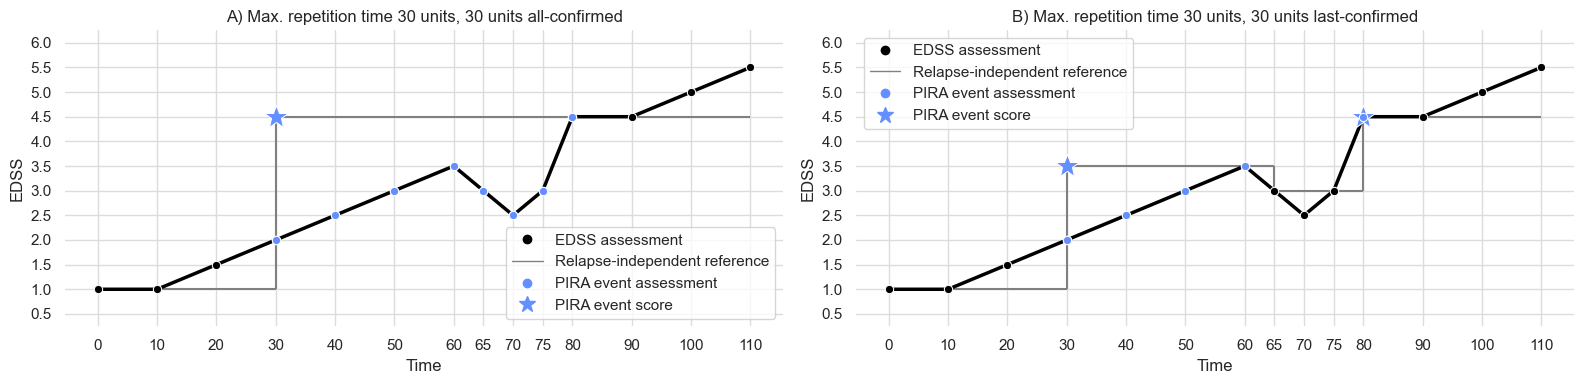

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
example_follow_up = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 65, 70, 75, 80, 90, 100, 110],
        "edss_score": [1, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 3.0, 2.5, 3.0, 4.5, 4.5, 5.0, 5.5],
    }
)

for i, elt in enumerate([
        ("all", "A) Max. repetition time 30 units, 30 units all-confirmed"),
        ("last", "B) Max. repetition time 30 units, 30 units last-confirmed"),
    ]):
    visualization.annotate_plot_follow_up(
        follow_up_dataframe=example_follow_up,
        relapse_timestamps=[],
        merge_continuous_events=True,
        continuous_events_max_repetition_time=30,
        opt_require_confirmation=True,
        opt_confirmation_time=30,
        opt_confirmation_included_values=elt[0],
        show_legend=True,
        move_legend_out=False,
        ax=axes[i],
    )
    axes[i].set_title(elt[1])

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

**Legend**: Event merging, max. repetition distance 20 units, 30 units confirmed disability accrual. **A)** Confirmation
for all values within the confirmation interval. The confirmed score at step 50 is 2.5, and it is considered a
repetition measurement of the score at step 40 because it is within the maximum repetition distance. The same is
true for the confirmed scores at steps 60, 65, and 70. The confirmed score at step 75 is 3.0, so the merging
continues. **B)** Confirmation only for the first value that satisfies the minimal confirmation distance. The confirmed
event score at step 60 is 3.5, since the corresponding confirmation assessment is the one at step 90. The
following score is lower, thus the merging is terminated.

# **Part 2 - Relapse-Related Definitions**

# Event types

### RAW and PIRA

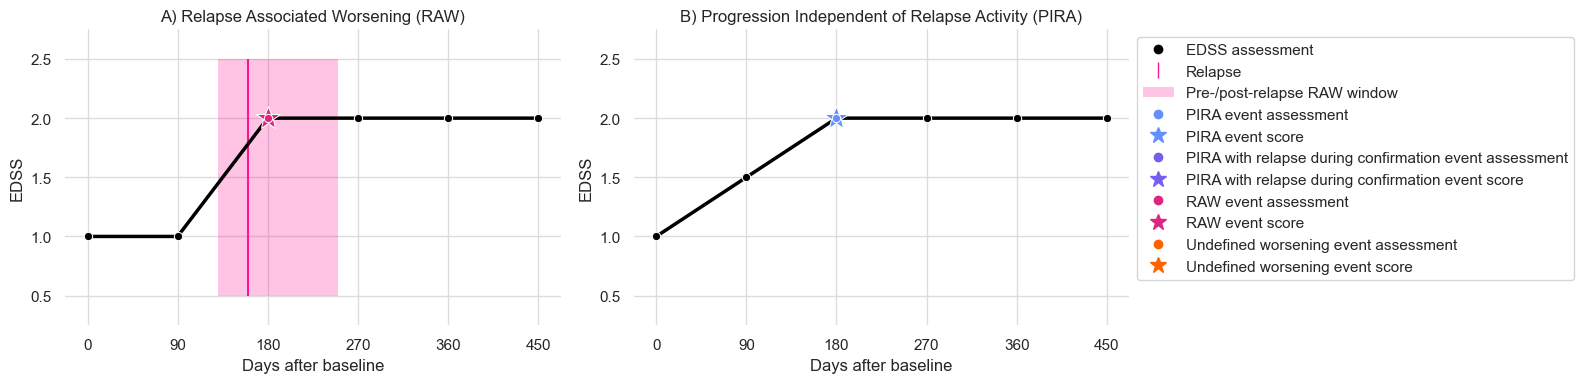

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

visualization.annotate_plot_follow_up(
    follow_up_dataframe=pd.DataFrame({"days_after_baseline": [0, 90, 180, 270, 360, 450], "edss_score": [1, 1, 2., 2, 2, 2]}),
    relapse_timestamps=[160],
    opt_baseline_type="roving",
    opt_roving_reference_require_confirmation=True,
    opt_roving_reference_confirmation_time=0.5,
    opt_require_confirmation=False,
    opt_confirmation_time=24 * 7,
    opt_raw_after_relapse_max_time=90,
    opt_raw_before_relapse_max_time=30,
    show_legend=False,
    move_legend_out=True,
    show_baselines=False,
    ax=axes[0],
)
axes[0].set_title("A) Relapse Associated Worsening (RAW)")

visualization.annotate_plot_follow_up(
    follow_up_dataframe=pd.DataFrame({"days_after_baseline": [0, 90, 180, 270, 360, 450], "edss_score": [1, 1.5, 2, 2, 2, 2]}),
    relapse_timestamps=[-100],
    opt_baseline_type="roving",
    opt_roving_reference_require_confirmation=True,
    opt_roving_reference_confirmation_time=0.5,
    opt_require_confirmation=True,
    opt_confirmation_time=24 * 7,
    opt_raw_after_relapse_max_time=30,
    opt_raw_before_relapse_max_time=30,
    show_legend=True,
    move_legend_out=True,
    show_baselines=False,
    ax=axes[1],
)
axes[1].set_title("B) Progression Independent of Relapse Activity (PIRA)")
axes[1].set_xlim(axes[0].get_xlim())

for ax in axes:
    ax.set_xlabel("Days after baseline")

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

### PIRA in RAW and undefined

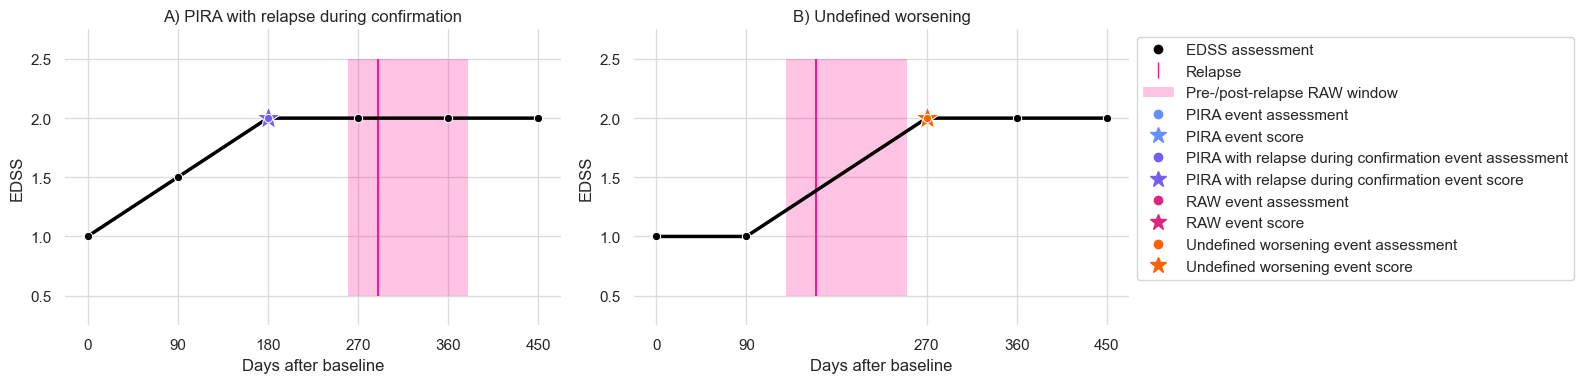

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

visualization.annotate_plot_follow_up(
    follow_up_dataframe=pd.DataFrame({"days_after_baseline": [0, 90, 270, 360, 450], "edss_score": [1, 1, 2, 2, 2]}),
    relapse_timestamps=[160],
    opt_baseline_type="roving",
    opt_roving_reference_require_confirmation=True,
    opt_roving_reference_confirmation_time=0.5,
    opt_require_confirmation=False,
    opt_confirmation_time=24 * 7,
    opt_raw_after_relapse_max_time=90,
    opt_raw_before_relapse_max_time=30,
    show_legend=True,
    move_legend_out=True,
    show_baselines=False,
    ax=axes[1],
)
axes[1].set_title("B) Undefined worsening")

visualization.annotate_plot_follow_up(
    follow_up_dataframe=pd.DataFrame({"days_after_baseline": [0, 90, 180, 270, 360, 450], "edss_score": [1, 1.5, 2, 2, 2, 2]}),
    relapse_timestamps=[290],
    opt_baseline_type="roving",
    opt_roving_reference_require_confirmation=True,
    opt_roving_reference_confirmation_time=0.5,
    opt_require_confirmation=True,
    opt_confirmation_time=24 * 7,
    opt_raw_after_relapse_max_time=90,
    opt_raw_before_relapse_max_time=30,
    show_legend=False,
    move_legend_out=True,
    show_baselines=False,
    ax=axes[0],
)
axes[0].set_title("A) PIRA with relapse during confirmation")

for ax in axes:
    ax.set_xlabel("Days after baseline")

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

### Two baselines for undefined

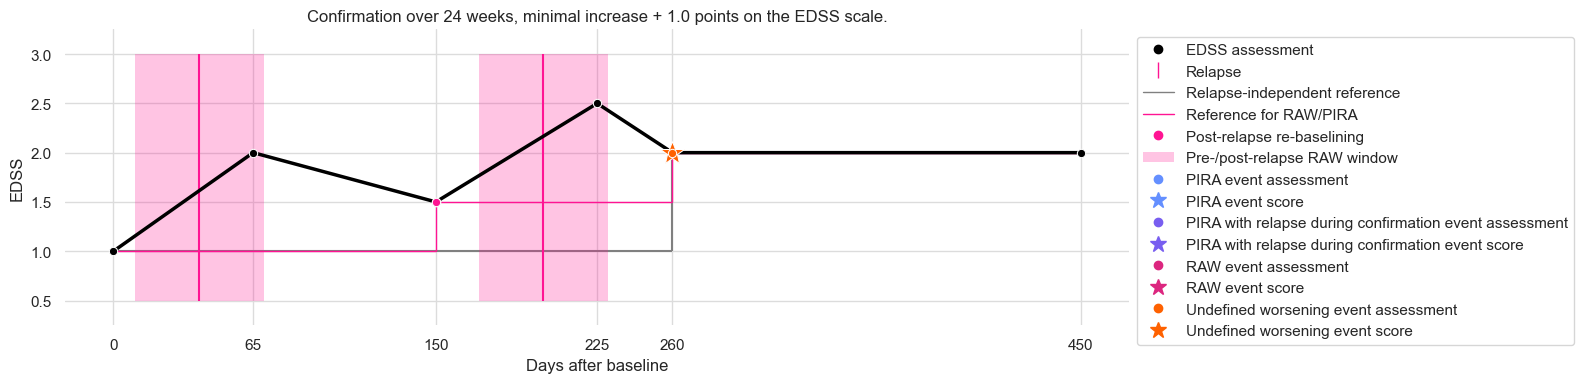

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))

visualization.annotate_plot_follow_up(
    follow_up_dataframe=pd.DataFrame(
        {
            "days_after_baseline": [0, 65, 150, 225, 260, 450],
            "edss_score": [1.0, 2.0, 1.5, 2.5, 2.0, 2.0],
        },
    ),
    relapse_timestamps=[40, 200],
    opt_baseline_type="roving",
    opt_roving_reference_require_confirmation=True,
    opt_roving_reference_confirmation_time=0.5,
    opt_require_confirmation=True,
    opt_confirmation_time=24 * 7,
    opt_raw_after_relapse_max_time=30,
    opt_raw_before_relapse_max_time=30,
    show_legend=True,
    move_legend_out=True,
    show_baselines=True,
    ax=ax,
)
ax.set_title("Confirmation over 24 weeks, minimal increase + 1.0 points on the EDSS scale.")
ax.set_xlabel("Days after baseline")


fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

### Relapses and confirmation

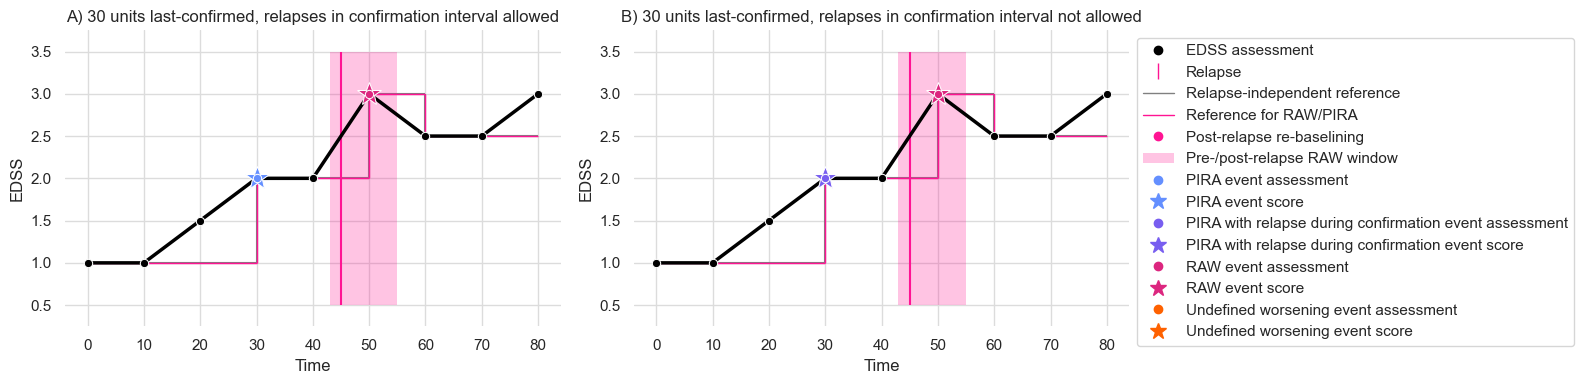

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

test_dataframe = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70, 80],
        "edss_score": [1, 1, 1.5, 2.0, 2.0, 3.0, 2.5, 2.5, 3.0],
    }
)
test_options = [
    (2, 10, True, 30, "last", True, "A) 30 units last-confirmed, relapses in confirmation interval allowed"),
    (2, 10, True, 30, "last", False, "B) 30 units last-confirmed, relapses in confirmation interval not allowed"),
]

for i, test_option in enumerate(test_options):
    visualization.annotate_plot_follow_up(
        relapse_timestamps=[45],
        follow_up_dataframe=test_dataframe,
        opt_raw_before_relapse_max_time=test_option[0],
        opt_raw_after_relapse_max_time=test_option[1],
        opt_require_confirmation=test_option[2],
        opt_confirmation_time=test_option[3],
        opt_confirmation_included_values=test_option[4],
        opt_pira_allow_relapses_between_event_and_confirmation=test_option[5],
        show_baselines=True,
        show_raw_window=True,
        show_progression=True,
        show_rebaselining=False,
        show_legend=not test_option[5],
        ax=axes[i],
    )
    axes[i].set_title(test_option[6])

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

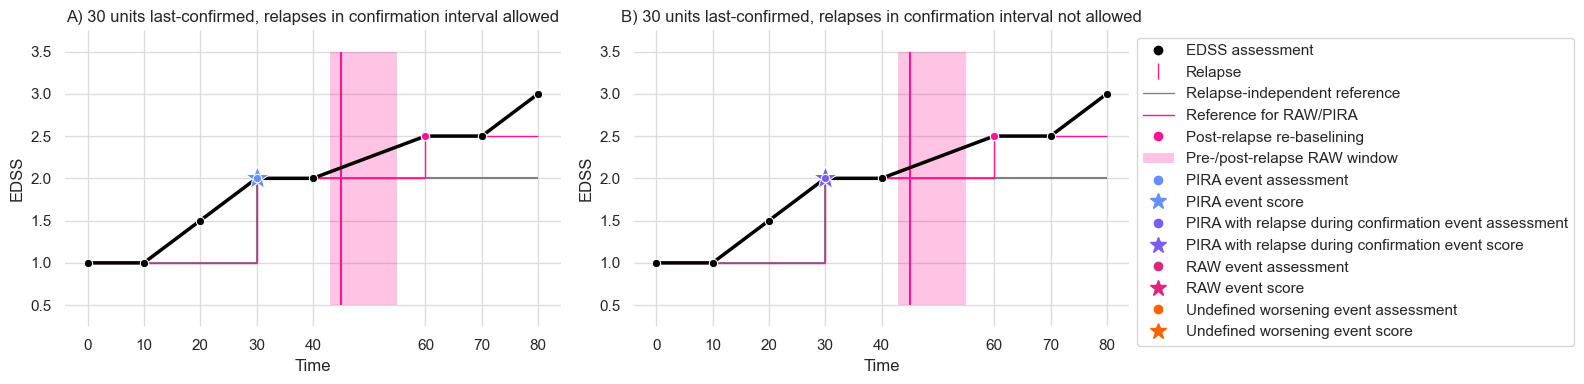

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

test_dataframe = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40, 60, 70, 80],
        "edss_score": [1, 1, 1.5, 2.0, 2.0, 2.5, 2.5, 3.0],
    }
)
test_options = [
    (2, 10, True, 30, "last", True, "A) 30 units last-confirmed, relapses in confirmation interval allowed"),
    (2, 10, True, 30, "last", False, "B) 30 units last-confirmed, relapses in confirmation interval not allowed"),
]

for i, test_option in enumerate(test_options):
    visualization.annotate_plot_follow_up(
        relapse_timestamps=[45],
        follow_up_dataframe=test_dataframe,
        opt_raw_before_relapse_max_time=test_option[0],
        opt_raw_after_relapse_max_time=test_option[1],
        opt_require_confirmation=test_option[2],
        opt_confirmation_time=test_option[3],
        opt_confirmation_included_values=test_option[4],
        opt_pira_allow_relapses_between_event_and_confirmation=test_option[5],
        show_baselines=True,
        show_raw_window=True,
        show_progression=True,
        show_rebaselining=False,
        show_legend=not test_option[5],
        ax=axes[i],
    )
    axes[i].set_title(test_option[6])

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

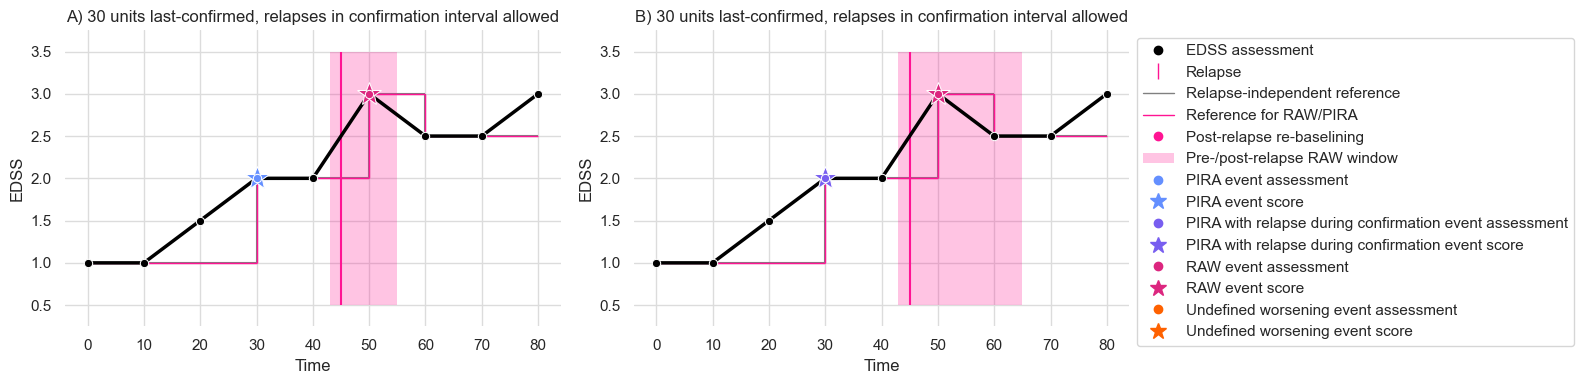

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

test_dataframe = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70, 80],
        "edss_score": [1, 1, 1.5, 2.0, 2.0, 3.0, 2.5, 2.5, 3.0],
    }
)
test_options = [
    (2, 10, True, 30, "last", True, "A) 30 units last-confirmed, relapses in confirmation interval allowed", False),
    (2, 20, True, 30, "last", True, "B) 30 units last-confirmed, relapses in confirmation interval allowed", True),
]

for i, test_option in enumerate(test_options):
    visualization.annotate_plot_follow_up(
        relapse_timestamps=[45],
        follow_up_dataframe=test_dataframe,
        opt_raw_before_relapse_max_time=test_option[0],
        opt_raw_after_relapse_max_time=test_option[1],
        opt_require_confirmation=test_option[2],
        opt_confirmation_time=test_option[3],
        opt_confirmation_included_values=test_option[4],
        opt_pira_allow_relapses_between_event_and_confirmation=test_option[5],
        show_baselines=True,
        show_raw_window=True,
        show_progression=True,
        show_rebaselining=False,
        show_legend=test_option[7],
        ax=axes[i],
    )
    axes[i].set_title(test_option[6])

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

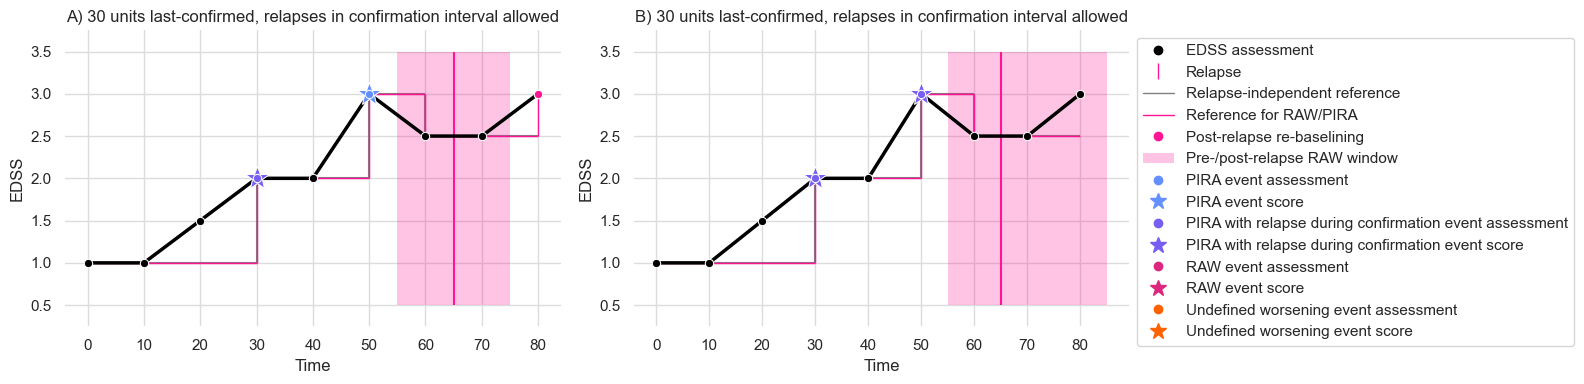

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

test_dataframe = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70, 80],
        "edss_score": [1, 1, 1.5, 2.0, 2.0, 3.0, 2.5, 2.5, 3.0],
    }
)
test_options = [
    (10, 10, True, 30, "last", True, "A) 30 units last-confirmed, relapses in confirmation interval allowed", False),
    (10, 20, True, 30, "last", True, "B) 30 units last-confirmed, relapses in confirmation interval allowed", True),
]

for i, test_option in enumerate(test_options):
    visualization.annotate_plot_follow_up(
        relapse_timestamps=[65],
        follow_up_dataframe=test_dataframe,
        opt_raw_before_relapse_max_time=test_option[0],
        opt_raw_after_relapse_max_time=test_option[1],
        opt_require_confirmation=test_option[2],
        opt_confirmation_time=test_option[3],
        opt_confirmation_included_values=test_option[4],
        opt_pira_allow_relapses_between_event_and_confirmation=test_option[5],
        show_baselines=True,
        show_raw_window=True,
        show_progression=True,
        show_rebaselining=False,
        show_legend=test_option[7],
        ax=axes[i],
    )
    axes[i].set_title(test_option[6])

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

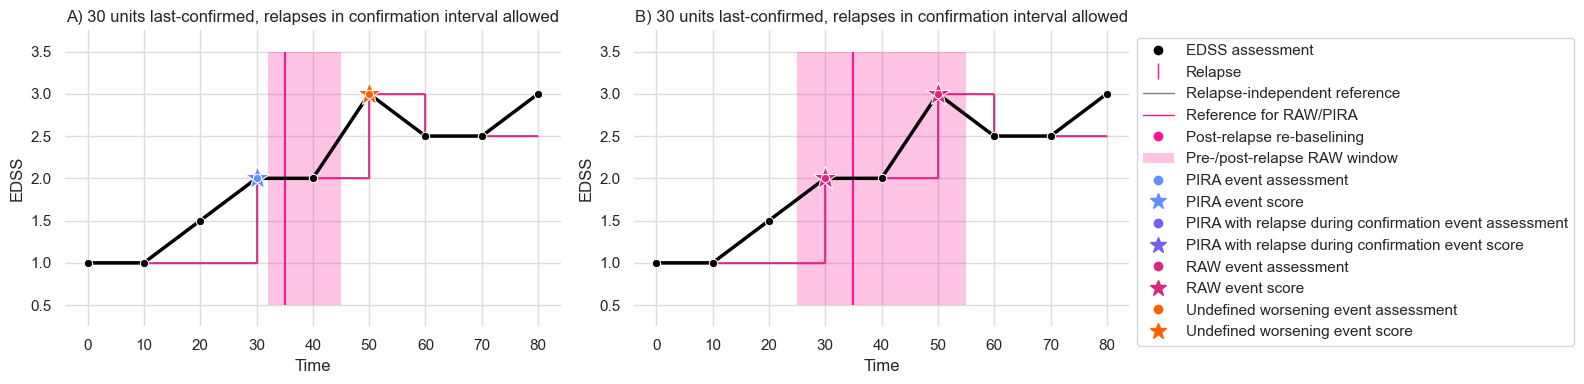

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

test_dataframe = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70, 80],
        "edss_score": [1, 1, 1.5, 2.0, 2.0, 3.0, 2.5, 2.5, 3.0],
    }
)
test_options = [
    (3, 10, True, 30, "last", True, "A) 30 units last-confirmed, relapses in confirmation interval allowed", False),
    (10, 20, True, 30, "last", True, "B) 30 units last-confirmed, relapses in confirmation interval allowed", True),
]

for i, test_option in enumerate(test_options):
    visualization.annotate_plot_follow_up(
        relapse_timestamps=[35],
        follow_up_dataframe=test_dataframe,
        opt_raw_before_relapse_max_time=test_option[0],
        opt_raw_after_relapse_max_time=test_option[1],
        opt_require_confirmation=test_option[2],
        opt_confirmation_time=test_option[3],
        opt_confirmation_included_values=test_option[4],
        opt_pira_allow_relapses_between_event_and_confirmation=test_option[5],
        show_baselines=True,
        show_raw_window=True,
        show_progression=True,
        show_rebaselining=False,
        show_legend=test_option[7],
        ax=axes[i],
    )
    axes[i].set_title(test_option[6])

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

### Event merging with different event types

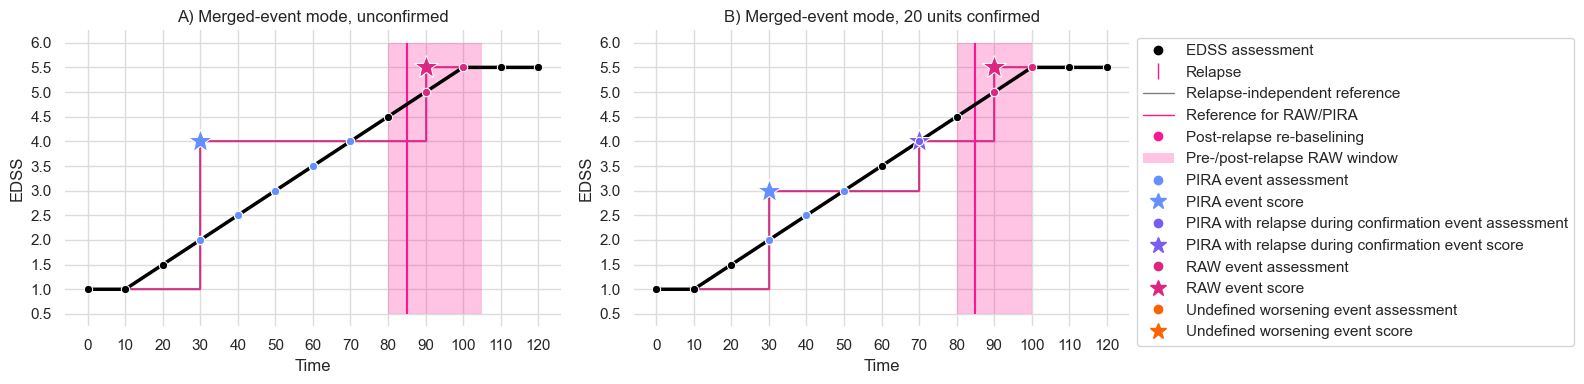

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
visualization.annotate_plot_follow_up(
    follow_up_dataframe=pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
            "edss_score": [1, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 5.5, 5.5],
        }
    ),
    relapse_timestamps=[85],
    opt_raw_before_relapse_max_time=5,
    opt_raw_after_relapse_max_time=20,
    merge_continuous_events=True,
    continuous_events_max_repetition_time=5,
    opt_require_confirmation=False,
    opt_confirmation_time=0.5,
    show_legend=False,
    move_legend_out=False,
    ax=axes[0],
)
axes[0].set_title("A) Merged-event mode, unconfirmed")
visualization.annotate_plot_follow_up(
    follow_up_dataframe=pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
            "edss_score": [1, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 5.5, 5.5],
        }
    ),
    relapse_timestamps=[85],
    opt_raw_before_relapse_max_time=5,
    opt_raw_after_relapse_max_time=15,
    merge_continuous_events=True,
    continuous_events_max_repetition_time=5,
    opt_require_confirmation=True,
    opt_confirmation_time=20,
    show_legend=True,
    move_legend_out=True,
    ax=axes[1],
)
axes[1].set_title("B) Merged-event mode, 20 units confirmed")
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

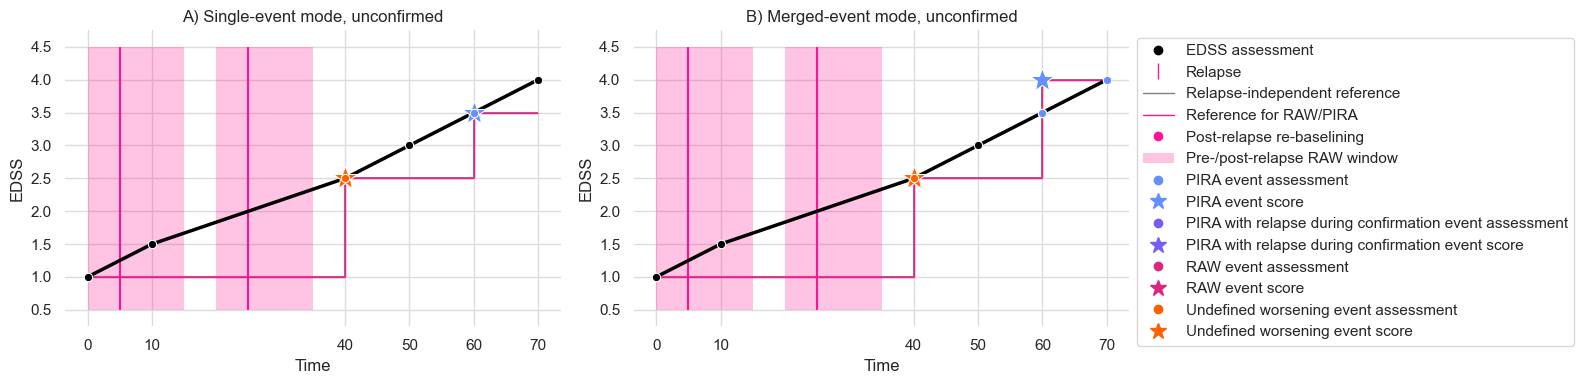

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

test_dataframe = pd.DataFrame(
    {"days_after_baseline": [0, 10, 40, 50, 60, 70], "edss_score": [1, 1.5, 2.5, 3, 3.5, 4.0]}
)

for i, elt in enumerate([
        (False, [5, 25], "A) Single-event mode, unconfirmed"),
        (True, [5, 25], "B) Merged-event mode, unconfirmed"),
    ]):
    visualization.annotate_plot_follow_up(
        relapse_timestamps=elt[1],
        # Input data general description
        follow_up_dataframe=test_dataframe,
        opt_baseline_type="fixed",
        merge_continuous_events=elt[0],
        continuous_events_max_repetition_time=10,
        # PRA/RAW
        opt_raw_before_relapse_max_time=5,
        opt_raw_after_relapse_max_time=10,
        show_baselines=True,
        show_raw_window=True,
        show_progression=True,
        show_rebaselining=False,
        show_legend=elt[0],
        move_legend_out=True,
        legend_loc="best",
        ax=axes[i],
    )
    axes[i].set_title(elt[2])

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

# Post-relapse re-baselining

## General rules

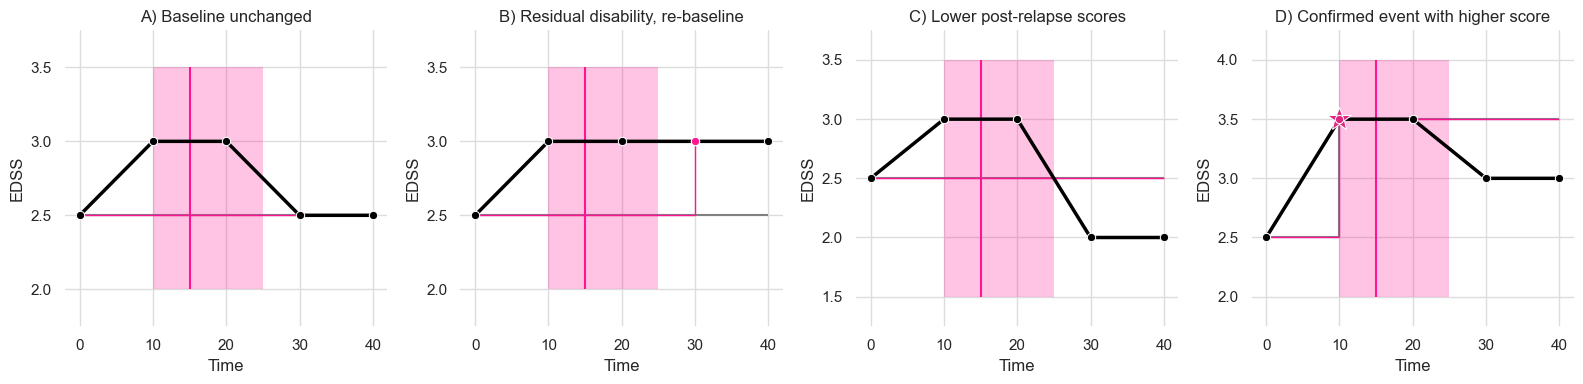

In [51]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
visualization.annotate_plot_follow_up(
    relapse_timestamps=[15],
    follow_up_dataframe=pd.DataFrame({"days_after_baseline": [0, 10, 20, 30, 40], "edss_score": [2.5, 3, 3, 2.5, 2.5]}),
    opt_baseline_type="fixed",
    opt_raw_before_relapse_max_time=5,
    opt_raw_after_relapse_max_time=10,
    opt_require_confirmation=True,
    opt_confirmation_time=0.5,
    show_baselines=True,
    show_raw_window=True,
    show_progression=True,
    show_rebaselining=False,
    show_legend=False,
    ax=axes[0],
)
axes[0].set_title("A) Baseline unchanged")

visualization.annotate_plot_follow_up(
    relapse_timestamps=[15],
    follow_up_dataframe=pd.DataFrame({"days_after_baseline": [0, 10, 20, 30, 40], "edss_score": [2.5, 3, 3, 3, 3]}),
    opt_baseline_type="fixed",
    opt_raw_before_relapse_max_time=5,
    opt_raw_after_relapse_max_time=10,
    opt_require_confirmation=True,
    opt_confirmation_time=0.5,
    show_baselines=True,
    show_raw_window=True,
    show_progression=True,
    show_rebaselining=False,
    show_legend=False,
    ax=axes[1],
)
axes[1].set_title("B) Residual disability, re-baseline")

visualization.annotate_plot_follow_up(
    relapse_timestamps=[15],
    follow_up_dataframe=pd.DataFrame({"days_after_baseline": [0, 10, 20, 30, 40], "edss_score": [2.5, 3, 3, 2, 2]}),
    opt_baseline_type="fixed",
    opt_raw_before_relapse_max_time=5,
    opt_raw_after_relapse_max_time=10,
    opt_require_confirmation=True,
    opt_confirmation_time=0.5,
    show_baselines=True,
    show_raw_window=True,
    show_progression=True,
    show_rebaselining=False,
    show_legend=False,
    ax=axes[2],
)
axes[2].set_title("C) Lower post-relapse scores")

visualization.annotate_plot_follow_up(
    relapse_timestamps=[15],
    follow_up_dataframe=pd.DataFrame({"days_after_baseline": [0, 10, 20, 30, 40], "edss_score": [2.5, 3.5, 3.5, 3, 3]}),
    opt_baseline_type="fixed",
    opt_raw_before_relapse_max_time=5,
    opt_raw_after_relapse_max_time=10,
    opt_require_confirmation=True,
    opt_confirmation_time=0.5,
    show_baselines=True,
    show_raw_window=True,
    show_progression=True,
    show_rebaselining=False,
    show_legend=False,
    ax=axes[3],
)
axes[3].set_title("D) Confirmed event with higher score")

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

## With events

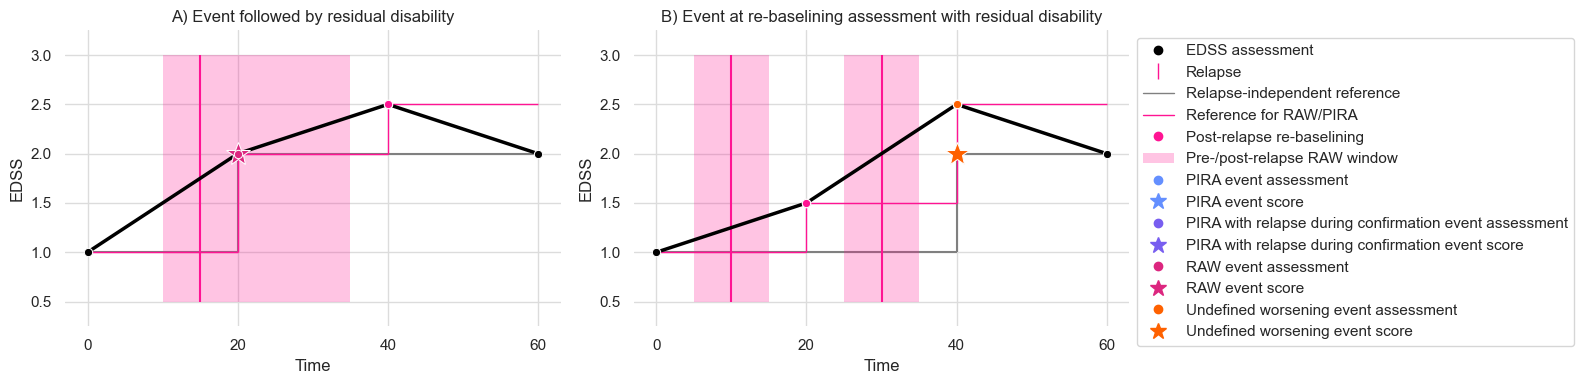

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

visualization.annotate_plot_follow_up(
    relapse_timestamps=[15],
    follow_up_dataframe=pd.DataFrame(
    {"days_after_baseline": [0, 20, 40, 60], 
    "edss_score": [1, 2.0, 2.5, 2]}
),
    opt_baseline_type="fixed",
    opt_require_confirmation=True,
    opt_confirmation_time=0.5,
    opt_raw_before_relapse_max_time=5,
    opt_raw_after_relapse_max_time=20,
    show_baselines=True,
    show_raw_window=True,
    show_progression=True,
    show_rebaselining=False,
    show_legend=False,
    ax=axes[0],
)

visualization.annotate_plot_follow_up(
    relapse_timestamps=[10, 30],
    follow_up_dataframe=pd.DataFrame(
    {"days_after_baseline": [0, 20, 40, 60], 
    "edss_score": [1, 1.5, 2.5, 2]}
),
    opt_baseline_type="fixed",
    opt_require_confirmation=True,
    opt_confirmation_time=0.5,
    opt_raw_before_relapse_max_time=5,
    opt_raw_after_relapse_max_time=5,
    show_baselines=True,
    show_raw_window=True,
    show_progression=True,
    show_rebaselining=False,
    show_legend=True,
    ax=axes[1],
)

axes[0].set_title("A) Event followed by residual disability")
axes[1].set_title("B) Event at re-baselining assessment with residual disability")

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

## With minimal distance

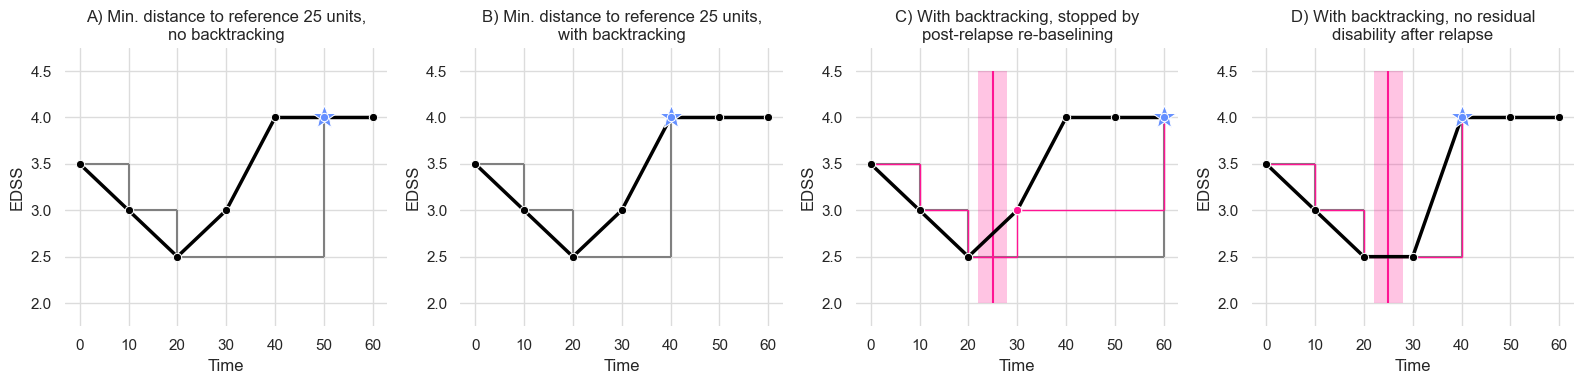

In [53]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

test_dataframe = pd.DataFrame({"days_after_baseline": [0, 10, 20, 30, 40, 50, 60], "edss_score": [3.5, 3, 2.5, 3, 4, 4, 4]})
test_options = [
    ([], 25, False, "A) Min. distance to reference 25 units,\nno backtracking"), 
    ([], 25, True, "B) Min. distance to reference 25 units,\nwith backtracking"),
    ([25], 25, True, "C) With backtracking, stopped by\npost-relapse re-baselining"),
    ([25], 25, True, "D) With backtracking, no residual\ndisability after relapse"),
]

for i, test_option in enumerate(test_options):
    if i < 3:
        visualization.annotate_plot_follow_up(
            relapse_timestamps=test_option[0],
            follow_up_dataframe=test_dataframe,
            opt_baseline_type="roving",
            opt_roving_reference_require_confirmation=False,
            opt_raw_before_relapse_max_time=3,
            opt_raw_after_relapse_max_time=3,
            opt_require_confirmation=False,
            opt_minimal_distance_time=test_option[1],
            opt_minimal_distance_type="reference",
            opt_minimal_distance_backtrack_decrease=test_option[2],
            show_baselines=True,
            show_raw_window=True,
            show_progression=True,
            show_rebaselining=False,
            show_legend=False,
            ax=axes[i],
        )
    else:
        test_dataframe.at[3, "edss_score"] = 2.5
        visualization.annotate_plot_follow_up(
            relapse_timestamps=test_option[0],
            follow_up_dataframe=test_dataframe,
            opt_baseline_type="roving",
            opt_roving_reference_require_confirmation=False,
            opt_raw_before_relapse_max_time=3,
            opt_raw_after_relapse_max_time=3,
            opt_require_confirmation=False,
            opt_minimal_distance_time=test_option[1],
            opt_minimal_distance_type="reference",
            opt_minimal_distance_backtrack_decrease=test_option[2],
            show_baselines=True,
            show_raw_window=True,
            show_progression=True,
            show_rebaselining=False,
            show_legend=False,
            ax=axes[i],
        ) 
    axes[i].set_title(test_option[3])


fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

## Special cases

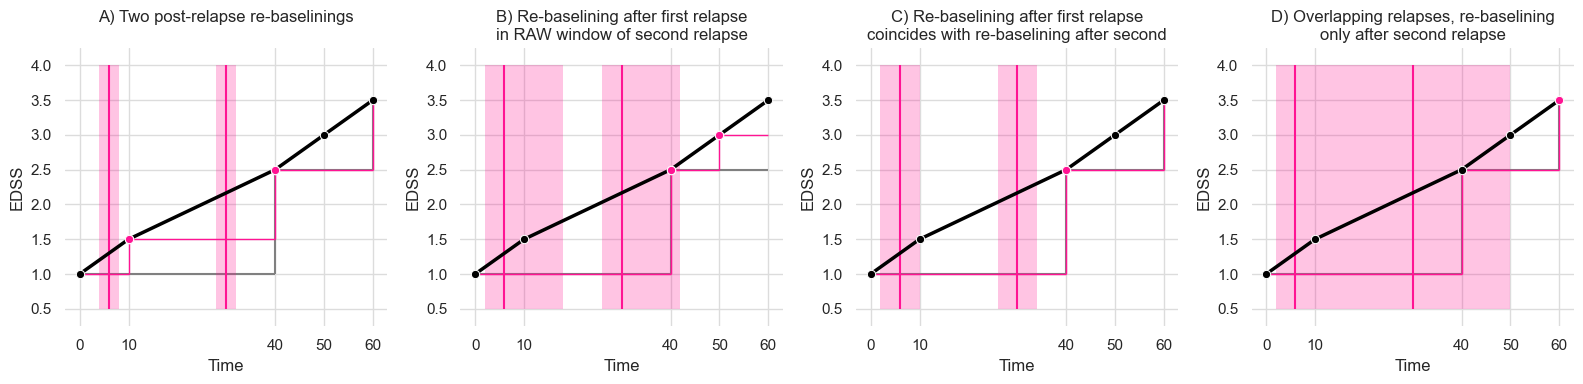

In [56]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

test_relapses_cases_1_2_3_4 = [6, 30]
test_dataframe_cases_1_2_3_4 = pd.DataFrame(
    {"days_after_baseline": [0, 10, 40, 50, 60], "edss_score": [1, 1.5, 2.5, 3, 3.5]}
)
window_sizes = [(2, 2), (4, 12), (4, 4), (4, 20)]

for i, window_size in enumerate(window_sizes):
    visualization.annotate_plot_follow_up(
        relapse_timestamps=test_relapses_cases_1_2_3_4,
        follow_up_dataframe=test_dataframe_cases_1_2_3_4,
        opt_baseline_type="fixed",
        # PRA/RAW
        opt_raw_before_relapse_max_time=window_size[0],
        opt_raw_after_relapse_max_time=window_size[1],
        show_baselines=True,
        show_raw_window=True,
        show_progression=False,
        show_rebaselining=False,
        show_legend=False,
        move_legend_out=False,
        legend_loc="best",
        ax=axes[i],
    )
axes[0].set_title("A) Two post-relapse re-baselinings\n")
axes[1].set_title("B) Re-baselining after first relapse\nin RAW window of second relapse")
axes[2].set_title("C) Re-baselining after first relapse\ncoincides with re-baselining after second")
axes[3].set_title("D) Overlapping relapses, re-baselining\nonly after second relapse")
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

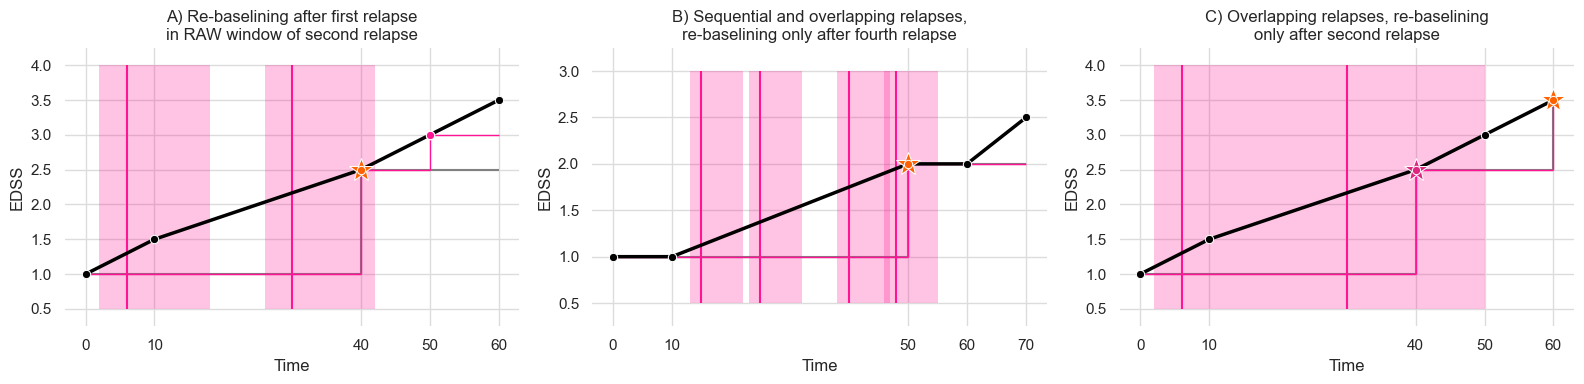

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

test_relapses_cases_1_2_3_4 = [6, 30]
test_dataframe_cases_1_2_3_4 = pd.DataFrame(
    {"days_after_baseline": [0, 10, 40, 50, 60], "edss_score": [1, 1.5, 2.5, 3, 3.5]}
)

visualization.annotate_plot_follow_up(
    relapse_timestamps=test_relapses_cases_1_2_3_4,
    follow_up_dataframe=test_dataframe_cases_1_2_3_4,
    opt_baseline_type="fixed",
    # PRA/RAW
    opt_raw_before_relapse_max_time=4,
    opt_raw_after_relapse_max_time=12,
    show_baselines=True,
    show_raw_window=True,
    show_progression=True,
    show_rebaselining=False,
    show_legend=False,
    move_legend_out=False,
    legend_loc="best",
    ax=axes[0],
)
visualization.annotate_plot_follow_up(
    relapse_timestamps=[15, 25, 40, 48],
    follow_up_dataframe=pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 50, 60, 70],
            "edss_score": [1, 1, 2, 2, 2.5],
        }
    ),
    opt_baseline_type="fixed",
    # PRA/RAW
    opt_raw_before_relapse_max_time=2,
    opt_raw_after_relapse_max_time=7,
    show_baselines=True,
    show_raw_window=True,
    show_progression=True,
    show_rebaselining=False,
    show_legend=False,
    ax=axes[1],
)
visualization.annotate_plot_follow_up(
        relapse_timestamps=test_relapses_cases_1_2_3_4,
        follow_up_dataframe=test_dataframe_cases_1_2_3_4,
        opt_baseline_type="fixed",
        # PRA/RAW
        opt_raw_before_relapse_max_time=4,
        opt_raw_after_relapse_max_time=20,
        show_baselines=True,
        show_raw_window=True,
        show_progression=True,
        show_rebaselining=False,
        show_legend=False,
        move_legend_out=False,
        legend_loc="best",
        ax=axes[2],
    )

axes[0].set_title("A) Re-baselining after first relapse\nin RAW window of second relapse")
axes[1].set_title("B) Sequential and overlapping relapses,\nre-baselining only after fourth relapse")
axes[2].set_title("C) Overlapping relapses, re-baselining\nonly after second relapse")

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

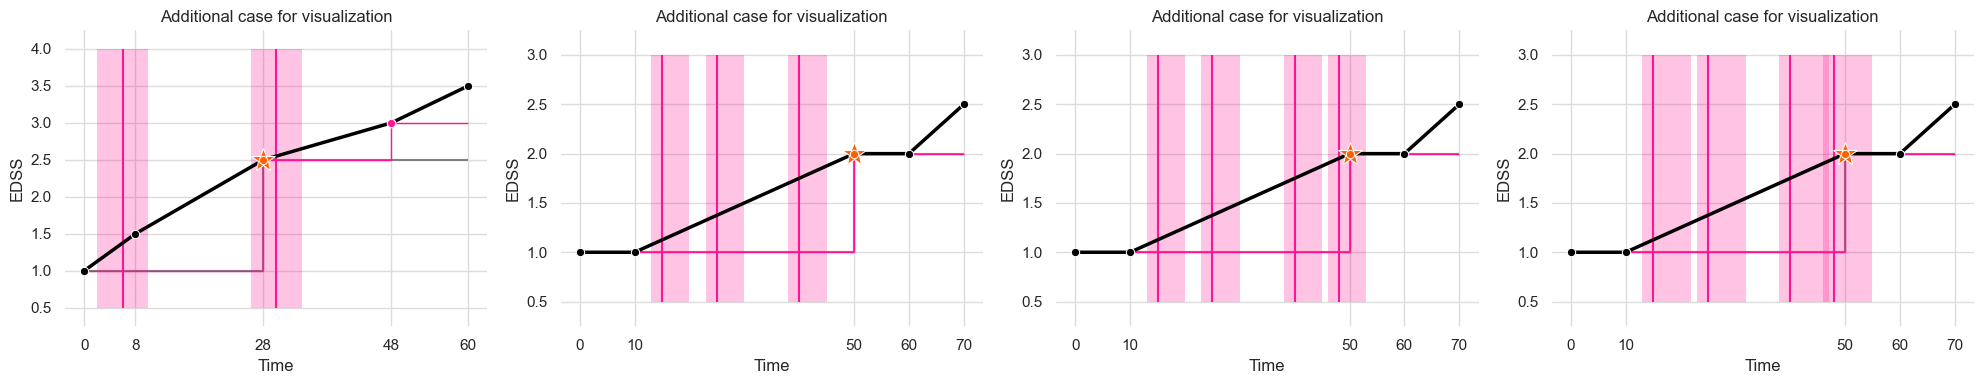

In [59]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

visualization.annotate_plot_follow_up(
    relapse_timestamps=[6, 30],
    follow_up_dataframe=pd.DataFrame(
        {"days_after_baseline": [0, 8, 28, 48, 60], "edss_score": [1, 1.5, 2.5, 3, 3.5]}
    ),
    opt_baseline_type="fixed",
    # PRA/RAW
    opt_raw_before_relapse_max_time=4,
    opt_raw_after_relapse_max_time=4,
    show_baselines=True,
    show_raw_window=True,
    show_progression=True,
    show_rebaselining=False,
    show_legend=False,
    ax=axes[0],
)
visualization.annotate_plot_follow_up(
    relapse_timestamps=[15, 25, 40],
    follow_up_dataframe=pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 50, 60, 70],
            "edss_score": [1, 1, 2, 2, 2.5],
        }
    ),
    opt_baseline_type="fixed",
    # PRA/RAW
    opt_raw_before_relapse_max_time=2,
    opt_raw_after_relapse_max_time=5,
    show_baselines=True,
    show_raw_window=True,
    show_progression=True,
    show_rebaselining=False,
    show_legend=False,
    ax=axes[1],
)
visualization.annotate_plot_follow_up(
    relapse_timestamps=[15, 25, 40, 48],
    follow_up_dataframe=pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 50, 60, 70],
            "edss_score": [1, 1, 2, 2, 2.5],
        }
    ),
    opt_baseline_type="fixed",
    # PRA/RAW
    opt_raw_before_relapse_max_time=2,
    opt_raw_after_relapse_max_time=5,
    show_baselines=True,
    show_raw_window=True,
    show_progression=True,
    show_rebaselining=False,
    show_legend=False,
    ax=axes[2],
)
axes[2].set_title("Additional case for visualization")
visualization.annotate_plot_follow_up(
    relapse_timestamps=[15, 25, 40, 48],
    follow_up_dataframe=pd.DataFrame(
        {
            "days_after_baseline": [0, 10, 50, 60, 70],
            "edss_score": [1, 1, 2, 2, 2.5],
        }
    ),
    opt_baseline_type="fixed",
    # PRA/RAW
    opt_raw_before_relapse_max_time=2,
    opt_raw_after_relapse_max_time=7,
    show_baselines=True,
    show_raw_window=True,
    show_progression=True,
    show_rebaselining=False,
    show_legend=False,
    ax=axes[3],
)
for ax in axes:
    ax.set_title("Additional case for visualization")
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

# Undefined progression

## Reasons for undefined

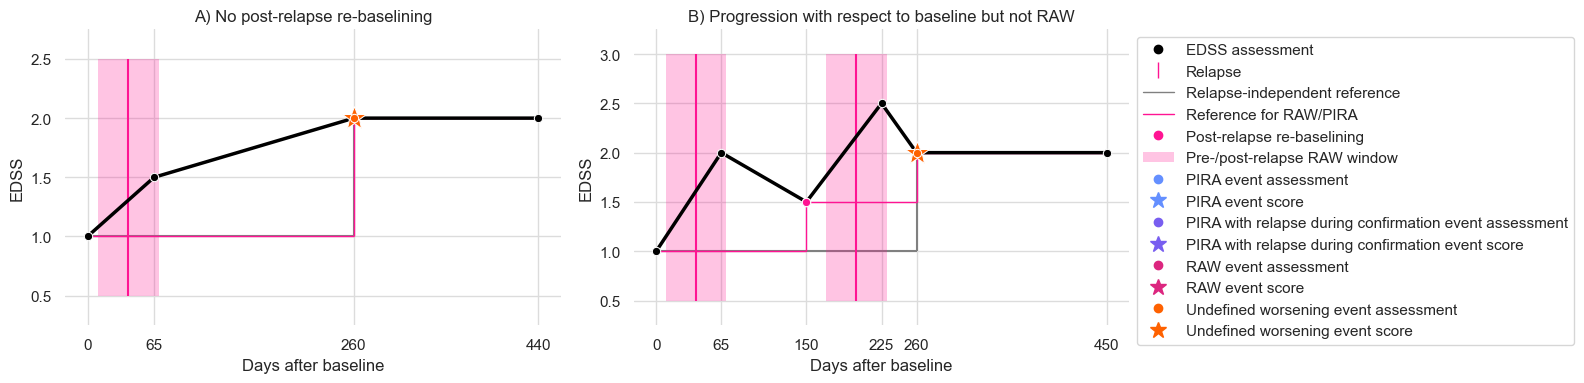

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

visualization.annotate_plot_follow_up(
    follow_up_dataframe=pd.DataFrame(
        {
            "days_after_baseline": [0, 65, 260, 440],
            "edss_score": [1.0, 1.5, 2.0, 2.0],
        }
    ),
    relapse_timestamps=[40],
    opt_baseline_type="roving",
    opt_roving_reference_require_confirmation=True,
    opt_roving_reference_confirmation_time=0.5,
    opt_require_confirmation=False,
    opt_confirmation_time=24 * 7,
    opt_raw_after_relapse_max_time=30,
    opt_raw_before_relapse_max_time=30,
    show_legend=False,
    move_legend_out=True,
    show_baselines=True,
    ax=axes[0],
)
axes[0].set_title("A) No post-relapse re-baselining")

visualization.annotate_plot_follow_up(
    follow_up_dataframe=pd.DataFrame(
        {
            "days_after_baseline": [0, 65, 150, 225, 260, 450],
            "edss_score": [1.0, 2.0, 1.5, 2.5, 2.0, 2.0],
        },
    ),
    relapse_timestamps=[40, 200],
    opt_baseline_type="roving",
    opt_roving_reference_require_confirmation=True,
    opt_roving_reference_confirmation_time=0.5,
    opt_require_confirmation=True,
    opt_confirmation_time=24 * 7,
    opt_raw_after_relapse_max_time=30,
    opt_raw_before_relapse_max_time=30,
    show_legend=True,
    move_legend_out=True,
    show_baselines=True,
    ax=axes[1],
)
axes[1].set_title("B) Progression with respect to baseline but not RAW")



for ax in axes:
    ax.set_xlabel("Days after baseline")


fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

## Undefined options

### Re-baselining only and never

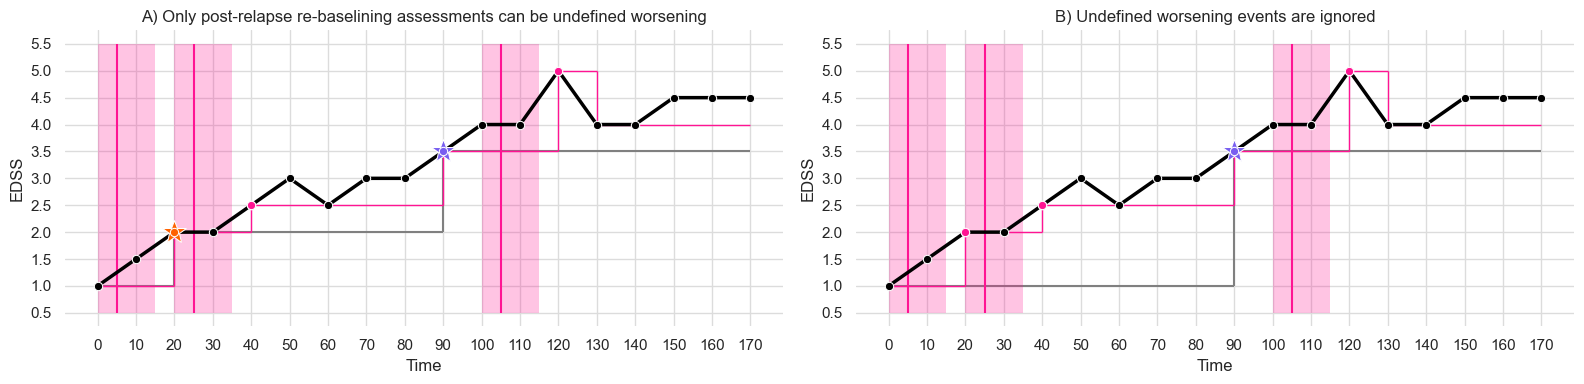

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

test_dataframe = pd.DataFrame(
    {
         "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170], 
        "edss_score": [1, 1.5, 2, 2, 2.5, 3, 2.5, 3, 3, 3.5, 4.0, 4.0, 5.0, 4.0, 4.0, 4.5, 4.5, 4.5]
    }
)
test_options = [(False, "re-baselining only", 30), (False, "never", 30)]

for i, test_option in enumerate(test_options):
    visualization.annotate_plot_follow_up(
        relapse_timestamps=[5, 25, 105],
        follow_up_dataframe=test_dataframe,
        return_first_event_only=test_option[0],
        undefined_progression=test_option[1],
        opt_raw_before_relapse_max_time=5,
        opt_raw_after_relapse_max_time=10,
        opt_require_confirmation=True,
        opt_confirmation_time=0.5,
        show_baselines=True,
        show_raw_window=True,
        show_progression=True,
        show_rebaselining=False,
        show_legend=False,
        ax=axes[i],
    )
axes[0].set_title("A) Only post-relapse re-baselining assessments can be undefined worsening")
axes[1].set_title("B) Undefined worsening events are ignored")
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

### All and end

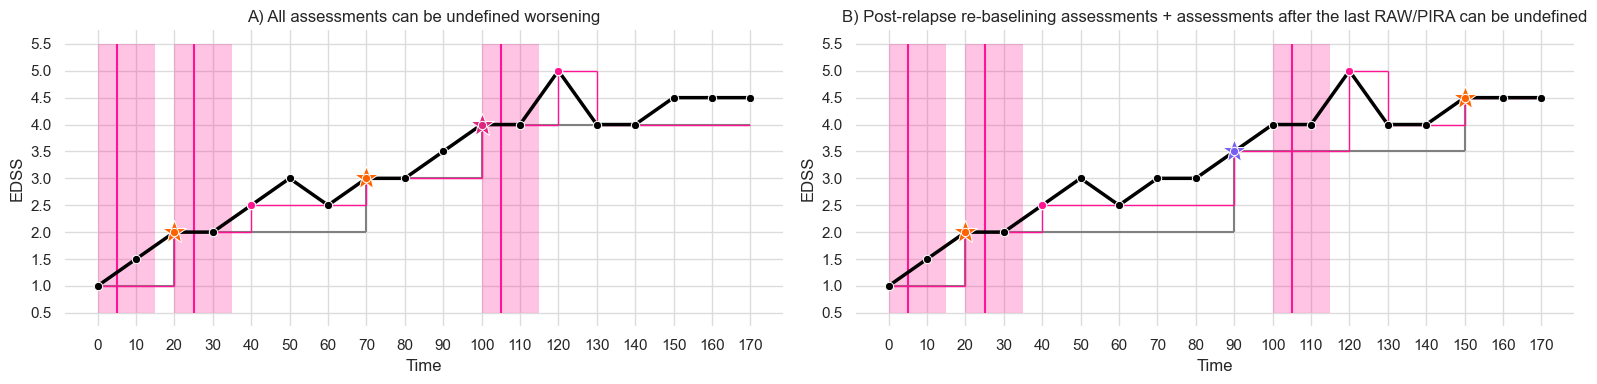

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

test_dataframe = pd.DataFrame(
    {
         "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170], 
        "edss_score": [1, 1.5, 2, 2, 2.5, 3, 2.5, 3, 3, 3.5, 4.0, 4.0, 5.0, 4.0, 4.0, 4.5, 4.5, 4.5]
    }
)
test_options = [(False, "all", 30), (False, "end", 30)]

for i, test_option in enumerate(test_options):
    visualization.annotate_plot_follow_up(
        relapse_timestamps=[5, 25, 105],
        follow_up_dataframe=test_dataframe,
        return_first_event_only=test_option[0],
        undefined_progression=test_option[1],
        opt_raw_before_relapse_max_time=5,
        opt_raw_after_relapse_max_time=10,
        opt_require_confirmation=True,
        opt_confirmation_time=0.5,
        show_baselines=True,
        show_raw_window=True,
        show_progression=True,
        show_rebaselining=False,
        show_legend=False,
        ax=axes[i],
    )
axes[0].set_title("A) All assessments can be undefined worsening")
axes[1].set_title("B) Post-relapse re-baselining assessments + assessments after the last RAW/PIRA can be undefined")
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

## Properties of undefined options

### Undetected overall events

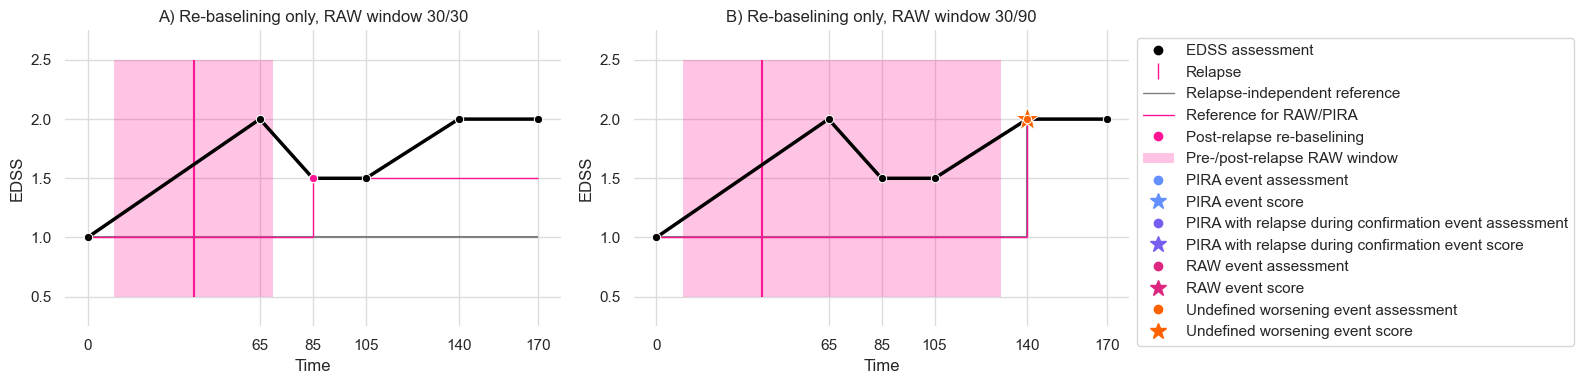

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

test_dataframe = pd.DataFrame(
        {"days_after_baseline": [0, 65, 85, 105, 140, 170], 
        "edss_score": [1, 2, 1.5, 1.5, 2, 2]}
    )
test_options = [(False, "re-baselining only", 30, False), (False, "re-baselining only", 90, True)]

for i, test_option in enumerate(test_options):
    visualization.annotate_plot_follow_up(
        relapse_timestamps=[40],
        follow_up_dataframe=test_dataframe,
        return_first_event_only=test_option[0],
        undefined_progression=test_option[1],
        opt_raw_before_relapse_max_time=30,
        opt_raw_after_relapse_max_time=test_option[2],
        opt_require_confirmation=True,
        opt_confirmation_time=0.5,
        show_baselines=True,
        show_raw_window=True,
        show_progression=True,
        show_rebaselining=False,
        show_legend=test_option[3],
        ax=axes[i],
    )
axes[0].set_title("A) Re-baselining only, RAW window 30/30")
axes[1].set_title("B) Re-baselining only, RAW window 30/90")
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

### Undefined events in RAW window

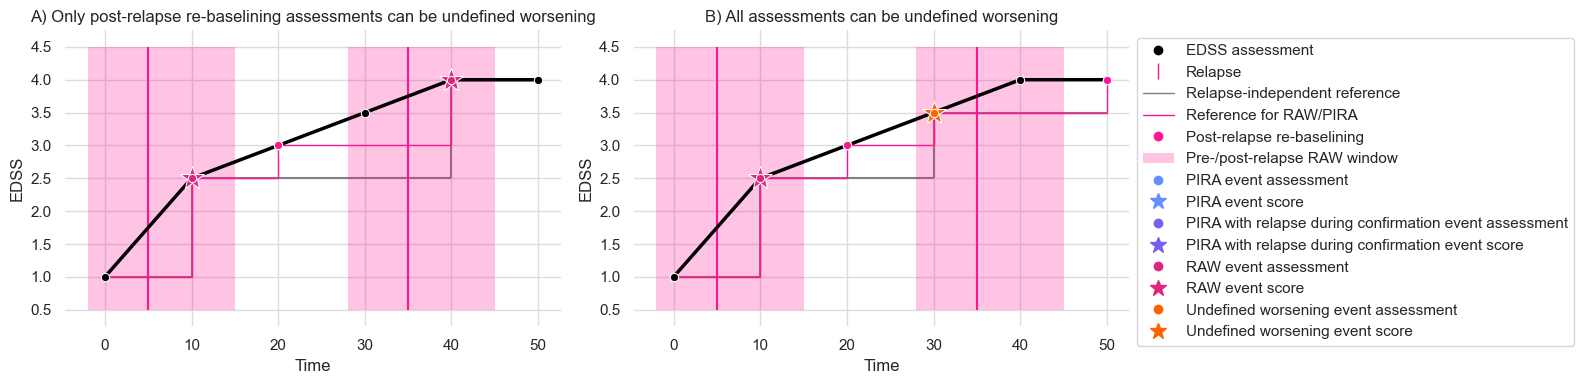

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

test_dataframe = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40, 50,],
        "edss_score": [1, 2.5, 3.0, 3.5, 4.0, 4.0]
    }
        #{"days_after_baseline": [i * 10 for i in range(17)], 
        #"edss_score": [1, 2.5, 3.0, 1.5, 3.5, 2, 2, 2, 1, 1, 4.5, 2.5, 2, 3, 3.5, 4, 4.5]}
    )
test_options = [(False, "re-baselining only"), (True, "all")]

for i, test_option in enumerate(test_options):
    visualization.annotate_plot_follow_up(
        relapse_timestamps=[5, 35],# 95],
        follow_up_dataframe=test_dataframe,
        undefined_progression=test_option[1],
        opt_raw_before_relapse_max_time=7,
        opt_raw_after_relapse_max_time=10,
        show_baselines=True,
        show_raw_window=True,
        show_progression=True,
        show_rebaselining=False,
        show_legend=test_option[0],
        ax=axes[i],
    )
axes[0].set_title("A) Only post-relapse re-baselining assessments can be undefined worsening")
axes[1].set_title("B) All assessments can be undefined worsening")
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

## Thresholds

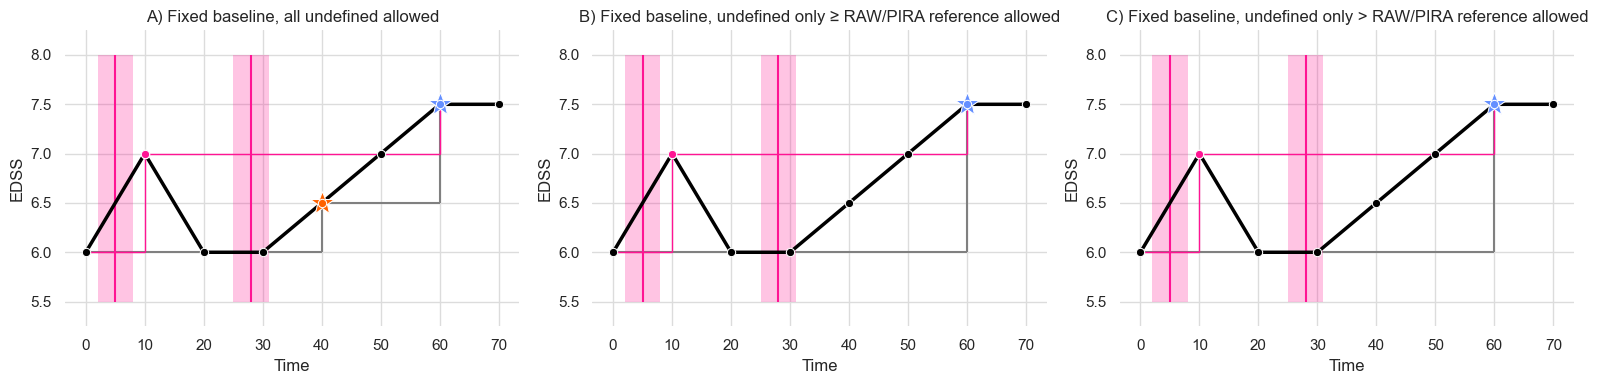

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

test_df_1 = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70],
        "edss_score": [6.0, 7.0, 6.0, 6.0, 6.5, 7.0, 7.5, 7.5],
    }
)
combos_1 = [
    ("any", "fixed", "A) Fixed baseline, all undefined allowed"),
    ("equal or greater", "fixed", "B) Fixed baseline, undefined only ≥ RAW/PIRA reference allowed"),
    ("greater only", "fixed", "C) Fixed baseline, undefined only > RAW/PIRA reference allowed"),
]

for i, combo in enumerate(combos_1):
    visualization.annotate_plot_follow_up(
        undefined_progression_wrt_raw_pira_baseline=combo[0],
        follow_up_dataframe=test_df_1,
        relapse_timestamps=[5, 28],
        opt_baseline_type=combo[1],
        opt_roving_reference_require_confirmation=True,
        opt_roving_reference_confirmation_time=0.5,
        opt_require_confirmation=True,
        opt_confirmation_time=-1,
        opt_raw_after_relapse_max_time=3,
        opt_raw_before_relapse_max_time=3,
        show_legend=False,
        move_legend_out=True,
        ax=axes[i],
    )
    axes[i].set_title(combo[2])

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

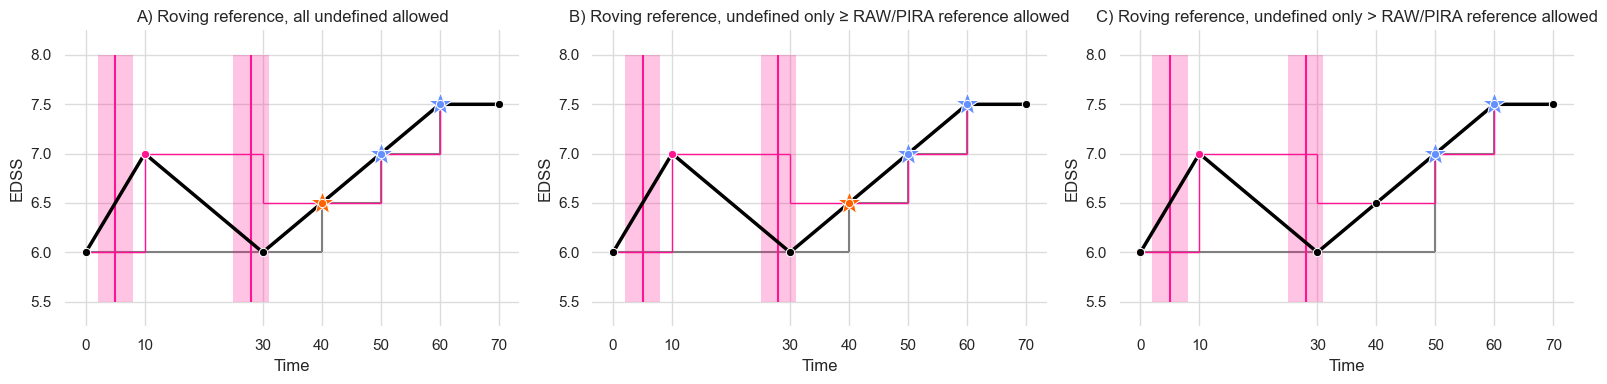

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

test_df_2 = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 30, 40, 50, 60, 70],
        "edss_score": [6.0, 7.0, 6.0, 6.5, 7.0, 7.5, 7.5],
    }
)
combos_1 = [
    ("any", "roving", "A) Roving reference, all undefined allowed"),
    ("equal or greater", "roving", "B) Roving reference, undefined only ≥ RAW/PIRA reference allowed"),
    ("greater only", "roving", "C) Roving reference, undefined only > RAW/PIRA reference allowed"),
]

for i, combo in enumerate(combos_1):
    visualization.annotate_plot_follow_up(
        undefined_progression_wrt_raw_pira_baseline=combo[0],
        follow_up_dataframe=test_df_2,
        relapse_timestamps=[5, 28],
        opt_baseline_type=combo[1],
        opt_roving_reference_require_confirmation=True,
        opt_roving_reference_confirmation_time=0.5,
        opt_require_confirmation=True,
        opt_confirmation_time=-1,
        opt_raw_after_relapse_max_time=3,
        opt_raw_before_relapse_max_time=3,
        show_legend=False,
        move_legend_out=True,
        ax=axes[i],
    )
    axes[i].set_title(combo[2])

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

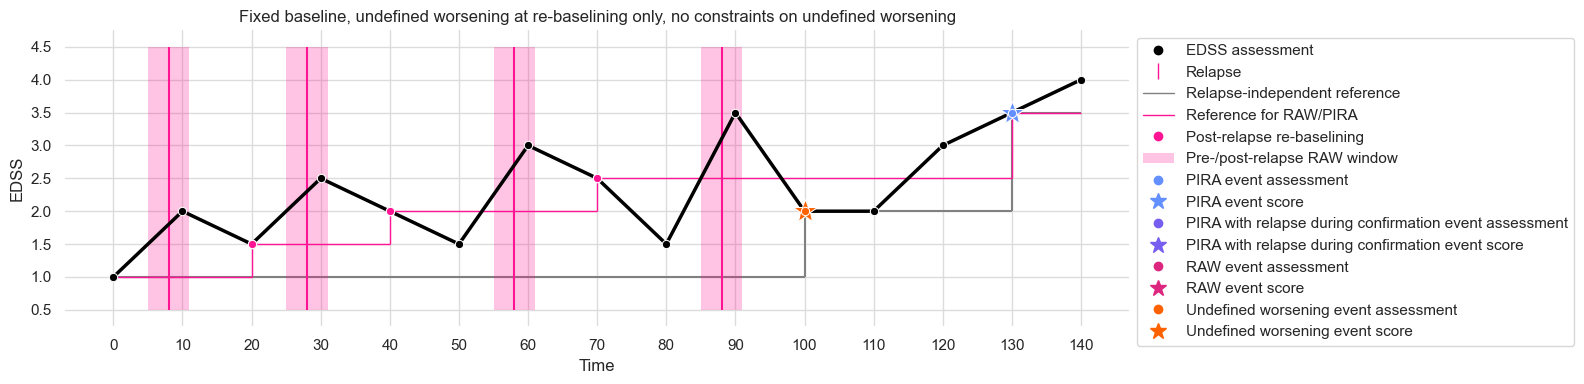

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))

test_df_4 = pd.DataFrame(
    {
        "days_after_baseline": [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
        "edss_score": [1.0, 2.0, 1.5, 2.5, 2.0, 1.5, 3.0, 2.5, 1.5, 3.5, 2.0, 2.0, 3.0, 3.5, 4.0],
    }
)

combos_4 = [
    ("any", "fixed", "Fixed baseline, undefined worsening at re-baselining only, no constraints on undefined worsening"),
]

for i, combo in enumerate(combos_4):
    visualization.annotate_plot_follow_up(
        undefined_progression_wrt_raw_pira_baseline=combo[0],
        follow_up_dataframe=test_df_4,
        relapse_timestamps=[8, 28, 58, 88],
        opt_baseline_type=combo[1],
        opt_roving_reference_require_confirmation=True,
        opt_roving_reference_confirmation_time=0.5,
        opt_require_confirmation=True,
        opt_confirmation_time=-1,
        opt_raw_after_relapse_max_time=3,
        opt_raw_before_relapse_max_time=3,
        show_legend=True,
        move_legend_out=True,
        ax=ax,
    )
    ax.set_title(combo[2])

fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()